## Problem statement 
- Analyse Telangana’s growth among different sectors quantitatively and provide useful Insights to the Telangana government that would help them to make data-informed decisions that would further support the growth of the state.

In [1]:
#importing libraries
import pandas as pd
import numpy as np

# Importing library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

### Analysis of fact_stamps 
- The table provides data on the revenue generated from document registrations and estamp challan payments aggregated at the district and monthly level.


In [2]:
#Reading the data 
stamp= pd.read_csv('fact_stamps.csv')
stamp.head()

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev
0,14_1,2019-04-01,4533,59236363,0,0
1,17_3,2019-04-01,4151,41508762,0,0
2,20_3,2019-04-01,2116,23674170,0,0
3,21_5,2019-04-01,1089,15915285,0,0
4,23_1,2019-04-01,6133,82593256,0,0


In [3]:
# total data size
stamp.shape

(1504, 6)

In [4]:
#looking the information of the dataframe
stamp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   dist_code                 1504 non-null   object
 1   month                     1504 non-null   object
 2   documents_registered_cnt  1504 non-null   int64 
 3   documents_registered_rev  1504 non-null   int64 
 4   estamps_challans_cnt      1504 non-null   int64 
 5   estamps_challans_rev      1504 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 70.6+ KB


#### Converting the month column datatype into date 

In [5]:
stamp['month'] = stamp.month.astype("datetime64")

In [6]:
# looking for null value
stamp.isna().sum()

dist_code                   0
month                       0
documents_registered_cnt    0
documents_registered_rev    0
estamps_challans_cnt        0
estamps_challans_rev        0
dtype: int64

### stamp has no null values

In [7]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [8]:
stamp.describe()

,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev
count,1504.00,1504.00,1504.00,1504.00
mean,3238.01,196296059.68,1944.86,146729889.80
std,4196.00,522459086.21,3740.31,496371751.40
min,0.00,0.00,0.00,0.00
25%,1013.50,18406550.25,0.00,0.00
50%,1964.50,35122414.50,805.00,17990396.00
75%,3952.50,93397986.00,2198.00,52994113.50
max,31310.00,4073496212.00,30526.00,4294273078.00


## Analysis of districts table
- The table contains information about districts.

In [9]:
# reading the data
district = pd.read_csv('dim_districts.csv')
district.head()

,dist_code,district
0,19_1,Adilabad
1,22_2,Bhadradri Kothagudem
2,21_1,Hanumakonda
3,16_1,Hyderabad
4,20_2,Jagtial


In [10]:
#looking the information of the dataframe
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dist_code  33 non-null     object
 1   district   33 non-null     object
dtypes: object(2)
memory usage: 656.0+ bytes


In [11]:
#lokking for null values
district.isnull().sum()

dist_code    0
district     0
dtype: int64

#### district table has no null value

## Analysis of date table
- This table contains the dates at the monthly level.The fiscal year of Telangana spans from April to March.

In [12]:
#reading the data
date= pd.read_csv('dim_date.csv')
date.head()

,month,Mmm,quarter,fiscal_year
0,2019-04-01,Apr,Q1,2019
1,2019-05-01,May,Q1,2019
2,2019-06-01,Jun,Q1,2019
3,2019-07-01,Jul,Q2,2019
4,2019-08-01,Aug,Q2,2019


In [13]:
#Total size of dataframe
date.shape

(48, 4)

In [14]:
#looking the information of the dataframe
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        48 non-null     object
 1   Mmm          48 non-null     object
 2   quarter      48 non-null     object
 3   fiscal_year  48 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.6+ KB


#### Converting datatype of month column 

In [15]:
date['month']= date['month'].astype('datetime64')

In [16]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   month        48 non-null     datetime64[ns]
 1   Mmm          48 non-null     object        
 2   quarter      48 non-null     object        
 3   fiscal_year  48 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
#looking for null value
date.isnull().sum()

month          0
Mmm            0
quarter        0
fiscal_year    0
dtype: int64

## Analysis of transport table
- The table provides information about the individual vehicle sales data from the RTA(Regional Transport Authority) of the state of Telangana categorized by fuel type,vehicle class, seating capacity, and other general categories aggregated at the district and monthly level.

In [18]:
#Reading the data
transport = pd.read_csv('fact_transport.csv')
transport.head()

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport
0,15_1,2019-04-01,17910,3011,76,22,15308,4429,0,4,1278,16110,4182,717,19542,1477,19856,1163
1,18_2,2019-04-01,3066,306,6,0,2995,142,49,64,128,3156,189,33,3322,56,3203,175
2,20_3,2019-04-01,1577,215,0,0,1546,79,29,21,117,1683,104,5,1751,41,1648,144
3,21_3,2019-04-01,1961,281,2,0,1939,72,72,48,113,2082,146,16,2209,35,2075,169
4,21_7,2019-04-01,1552,309,0,0,1512,76,69,109,95,1696,145,20,1820,41,1701,160


In [19]:
#looking the information of the dataframe
transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   dist_code                  1440 non-null   object
 1   month                      1440 non-null   object
 2   fuel_type_petrol           1440 non-null   int64 
 3   fuel_type_diesel           1440 non-null   int64 
 4   fuel_type_electric         1440 non-null   int64 
 5   fuel_type_others           1440 non-null   int64 
 6   vehicleClass_MotorCycle    1440 non-null   int64 
 7   vehicleClass_MotorCar      1440 non-null   int64 
 8   vehicleClass_AutoRickshaw  1440 non-null   int64 
 9   vehicleClass_Agriculture   1440 non-null   int64 
 10  vehicleClass_others        1440 non-null   int64 
 11  seatCapacity_1_to_3        1440 non-null   int64 
 12  seatCapacity_4_to_6        1440 non-null   int64 
 13  seatCapacity_above_6       1440 non-null   int64 
 14  Brand_ne

#### Converting datatype of month column 

In [20]:
transport['month']= transport['month'].astype('datetime64')

In [21]:
#looking for null values
transport.isnull().sum()

dist_code                    0
month                        0
fuel_type_petrol             0
fuel_type_diesel             0
fuel_type_electric           0
fuel_type_others             0
vehicleClass_MotorCycle      0
vehicleClass_MotorCar        0
vehicleClass_AutoRickshaw    0
vehicleClass_Agriculture     0
vehicleClass_others          0
seatCapacity_1_to_3          0
seatCapacity_4_to_6          0
seatCapacity_above_6         0
Brand_new_vehicles           0
Pre-owned_vehicles           0
category_Non-Transport       0
category_Transport           0
dtype: int64

## Analysis of ipass table
- The TS-iPASS dataset in Telangana comprises data concerning units or businesses established within the state under the "Industrial Project Approval and Self-Certification System" (iPASS). This government initiative aims to foster industrial growth and investment by streamlining project approvals and enabling self-certification for businesses.

In [22]:
# reading the data
ipass= pd.read_csv('fact_TS_iPASS.csv')
ipass.head()

,dist_code,month,sector,investment in cr,number_of_employees
0,14_1,01-04-2019,Engineering,2.32,15
1,19_1,01-04-2019,Engineering,0.62,13
2,20_3,01-04-2019,Wood and Leather,0.20,8
3,20_3,01-04-2019,Textiles,0.27,27
4,21_5,01-04-2019,Electrical and Electronic Products,0.12,5


### Looking for null values

In [23]:
ipass.isnull().sum()

dist_code              0
month                  0
sector                 0
investment in cr       0
number_of_employees    0
dtype: int64

In [24]:
ipass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5753 entries, 0 to 5752
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dist_code            5753 non-null   object 
 1   month                5753 non-null   object 
 2   sector               5753 non-null   object 
 3   investment in cr     5753 non-null   float64
 4   number_of_employees  5753 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 224.9+ KB


In [25]:
ipass.describe()

,investment in cr,number_of_employees
count,5753.00,5753.00
mean,17.23,117.34
std,257.43,1398.73
min,0.00,0.00
25%,0.22,7.00
50%,0.74,15.00
75%,3.12,40.00
max,17793.35,57000.00


In [26]:
ipass["month"]= ipass.month.astype('datetime64')

In [27]:
ipass["Year"] = pd.DatetimeIndex(ipass["month"]).year

In [28]:
ipass.Year.value_counts()

2021    1543
2022    1493
2020    1368
2019    1013
2023     336
Name: Year, dtype: int64

#### analysis of investment column

<AxesSubplot:xlabel='investment in cr'>

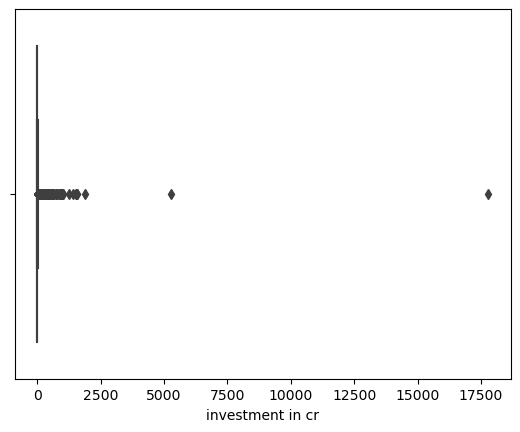

In [29]:
sns.boxplot(data=ipass, x='investment in cr')

In [30]:
ipass['investment in cr'].max()

17793.3508

In [31]:
ipass[ipass['investment in cr']==17793.3508]

,dist_code,month,sector,investment in cr,number_of_employees,Year
1177,15_1,2020-01-02,"Real Estate,Industrial Parks and IT Buildings",17793.35,25419,2020


### We cannot say that investment has outliers since there is no cap in investment

# Data visualization

#### Merging stamp and date dataframe

In [32]:
#joining stamp dataframe with date dataframe
stamp_date= pd.merge(stamp,date, how="inner", on="month")

In [33]:
stamp_date.head()

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,Mmm,quarter,fiscal_year
0,14_1,2019-04-01,4533,59236363,0,0,Apr,Q1,2019
1,17_3,2019-04-01,4151,41508762,0,0,Apr,Q1,2019
2,20_3,2019-04-01,2116,23674170,0,0,Apr,Q1,2019
3,21_5,2019-04-01,1089,15915285,0,0,Apr,Q1,2019
4,23_1,2019-04-01,6133,82593256,0,0,Apr,Q1,2019


In [34]:
stamp.shape

(1504, 6)

### Looking for pattern in documents registered revenue from 2019 to 2022

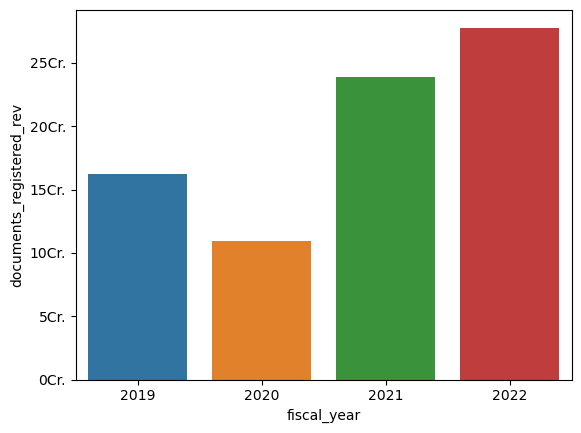

In [35]:
ax=sns.barplot(data=stamp_date, x="fiscal_year", y='documents_registered_rev', ci=False)
plt.ticklabel_format(style="plain", axis='y')
import matplotlib.ticker as ticker
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:.0f}Cr.'.format(x/10000000))
ax.yaxis.set_major_formatter(ticks_y)

### observation:
- In year 2022 revenue generated  by documents registered is maximum. 
- In year 2020 revenue generated by documents registered is minimum.

### Looking for pattern in documents registered revenue for different quarters

<AxesSubplot:xlabel='quarter', ylabel='documents_registered_rev'>

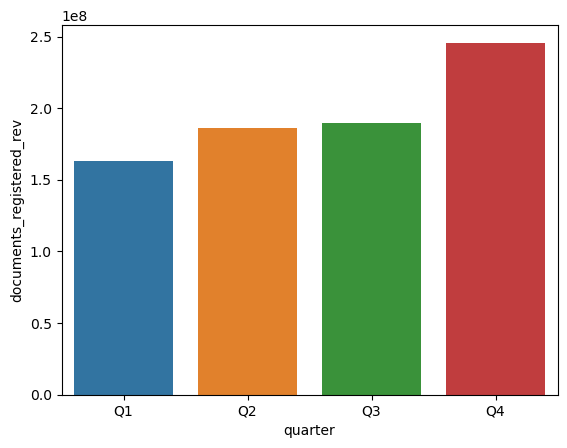

In [36]:
sns.barplot(data= stamp_date, x='quarter',y='documents_registered_rev', ci=False)

### Observation:
- In 4th Quarter(Q4) revenue generated by documents registered is maximum.
- In 1st Quarter(Q1) revenue generated by documents registered is minimum.

### Looking for pattern in documents registered revenue for different months

<AxesSubplot:xlabel='Mmm', ylabel='documents_registered_rev'>

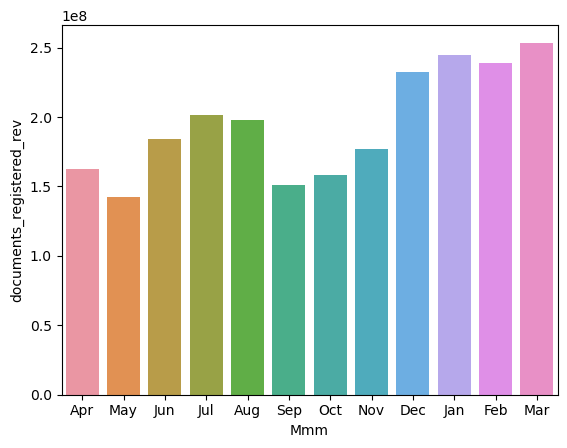

In [37]:
sns.barplot(data=stamp_date, x="Mmm",y="documents_registered_rev", ci=False)

### Observation:
- In March revenue generated by documents registered is maximum.
- In May revenue generated by documents registered is minimum.

### Looking for pattern in estamps challan revenue from 2019 to 2022

<AxesSubplot:xlabel='fiscal_year', ylabel='estamps_challans_rev'>

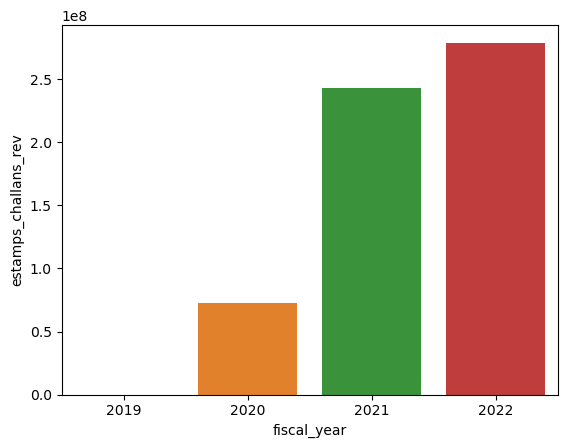

In [38]:
sns.barplot(data=stamp_date, x="fiscal_year",y="estamps_challans_rev", ci=False)

In [39]:
stamp_date[stamp_date['fiscal_year']=='2019']

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,Mmm,quarter,fiscal_year


### Observation:
- In year 2022 revenue generated by estamps challans is maximum.
- In year 2020 revenue generated by estamps challans is minimum.
- In year 2019 no revenue was generated by estamps challans. 

### Looking for pattern in estamps challan revenue for different quarters

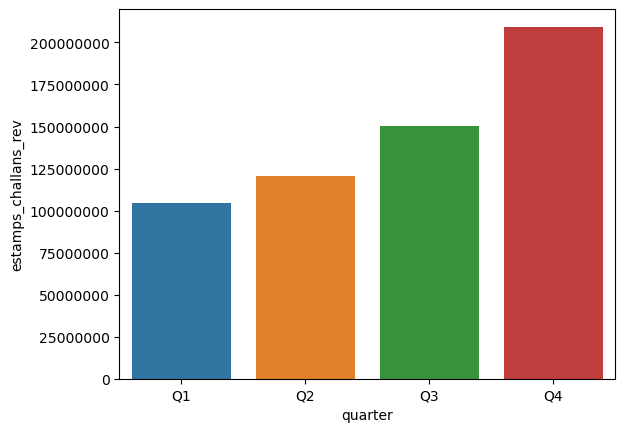

In [40]:
sns.barplot(data=stamp_date, x="quarter", y="estamps_challans_rev", ci=False)
plt.ticklabel_format(style="plain", axis='y')
plt.show()

### Observation:
- In 4th Quarter revenue generated by estamps challans is maximum.
- In 1st quarter revenue generated by estamps challans is minimum.

<AxesSubplot:xlabel='Mmm', ylabel='estamps_challans_rev'>

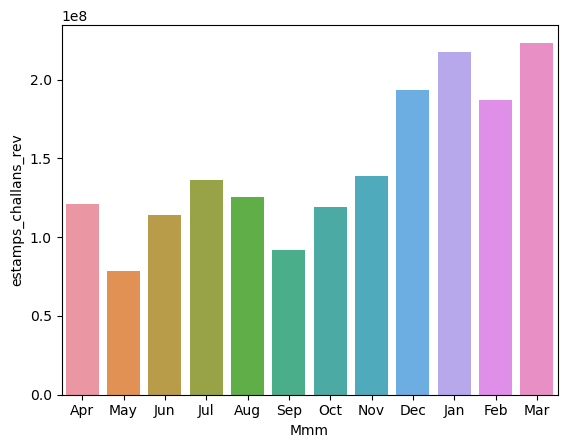

In [41]:
sns.barplot(data=stamp_date, x="Mmm", y="estamps_challans_rev", ci=False)

### Observation:
- In March revenue generated by estamps challans is maximum.
- In May revenue generated by estamps challans is minimum.

#### Merging district , stamp and date dataframe

In [42]:
districtwise= pd.merge(stamp_date,district, how='inner', on= 'dist_code')

In [43]:
districtwise.head()

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,Mmm,quarter,fiscal_year,district
0,14_1,2019-04-01,4533,59236363,0,0,Apr,Q1,2019,Mahabubnagar
1,14_1,2019-05-01,4301,73344601,0,0,May,Q1,2019,Mahabubnagar
2,14_1,2019-06-01,3565,50331243,0,0,Jun,Q1,2019,Mahabubnagar
3,14_1,2019-07-01,5056,58994710,0,0,Jul,Q2,2019,Mahabubnagar
4,14_1,2019-08-01,4864,73289753,0,0,Aug,Q2,2019,Mahabubnagar


### Looking for pattern between document registered and estamps challan revenue from 2019 to 2022

Text(0, 0.5, 'estamps_challans_rev')

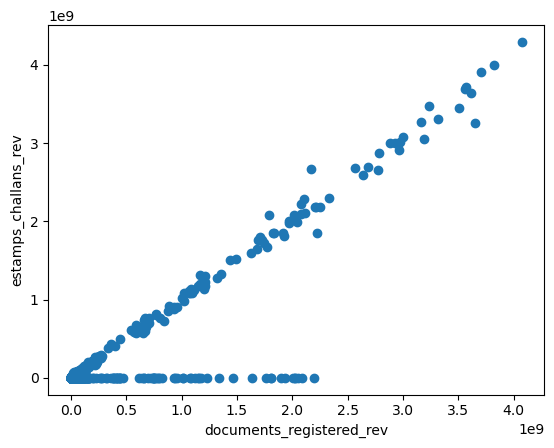

In [44]:
plt.scatter(data= districtwise, x='documents_registered_rev', y='estamps_challans_rev')
plt.xlabel('documents_registered_rev')
plt.ylabel('estamps_challans_rev')

#### To get more clear understanding looking the relation every year

In [45]:
df=  districtwise[districtwise['fiscal_year']==2019]
df1= districtwise[districtwise['fiscal_year']==2020] 
df2= districtwise[districtwise['fiscal_year']==2021]
df3= districtwise[districtwise['fiscal_year']==2022]

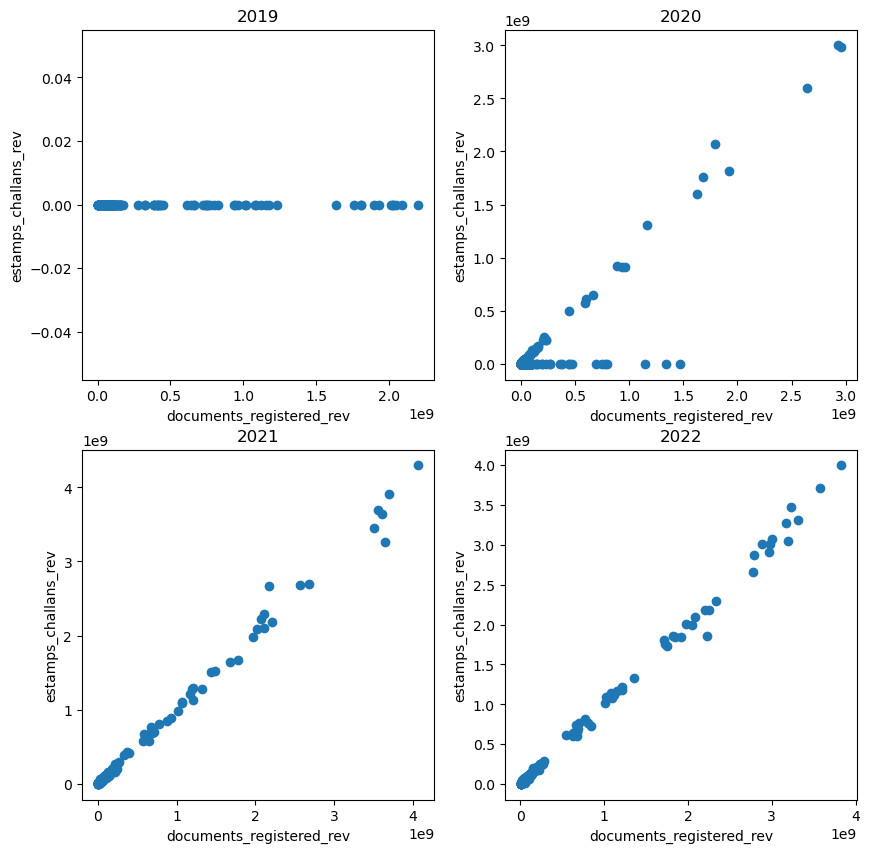

In [46]:
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.scatter(data= df, x='documents_registered_rev', y='estamps_challans_rev')
plt.title("2019")
plt.xlabel('documents_registered_rev')
plt.ylabel('estamps_challans_rev')
plt.subplot(2,2,2)
plt.scatter(data= df1, x='documents_registered_rev', y='estamps_challans_rev')
plt.title("2020")
plt.xlabel('documents_registered_rev')
plt.ylabel('estamps_challans_rev')
plt.subplot(2,2,3)
plt.scatter(data= df2, x='documents_registered_rev', y='estamps_challans_rev')
plt.title("2021")
plt.xlabel('documents_registered_rev')
plt.ylabel('estamps_challans_rev')

plt.subplot(2,2,4)
plt.scatter(data= df3, x='documents_registered_rev', y='estamps_challans_rev')
plt.title("2022")
plt.xlabel('documents_registered_rev')
plt.ylabel('estamps_challans_rev')
plt.show()

In [47]:
print(df[['documents_registered_cnt','estamps_challans_cnt']].sum())
print("percentage of estamps_challans w.r.t documents_registered  ",round((df['estamps_challans_cnt'].sum()/df['documents_registered_cnt'].sum())*100,2),"%")
print("-"*50)
print(df1[['documents_registered_cnt','estamps_challans_cnt']].sum())
print("percentage of estamps_challans w.r.t documents_registered  ",round((df1['estamps_challans_cnt'].sum()/df1['documents_registered_cnt'].sum())*100,2),"%")
print("-"*50)
print(df2[['documents_registered_cnt','estamps_challans_cnt']].sum())
print("percentage of estamps_challans w.r.t documents_registered  ",round((df2['estamps_challans_cnt'].sum()/df2['documents_registered_cnt'].sum())*100,2),"%")
print("-"*50)
print(df3[['documents_registered_cnt','estamps_challans_cnt']].sum())
print("percentage of estamps_challans w.r.t documents_registered  ",round((df3['estamps_challans_cnt'].sum()/df3['documents_registered_cnt'].sum())*100,2),"%")

documents_registered_cnt    1614417
estamps_challans_cnt              0
dtype: int64
percentage of estamps_challans w.r.t documents_registered   0.0 %
--------------------------------------------------
documents_registered_cnt    943893
estamps_challans_cnt        496132
dtype: int64
percentage of estamps_challans w.r.t documents_registered   52.56 %
--------------------------------------------------
documents_registered_cnt    1104580
estamps_challans_cnt        1173978
dtype: int64
percentage of estamps_challans w.r.t documents_registered   106.28 %
--------------------------------------------------
documents_registered_cnt    1207073
estamps_challans_cnt        1254961
dtype: int64
percentage of estamps_challans w.r.t documents_registered   103.97 %


### Observation:
- No data of estamp challan in 2019. So there is no relation.(Fig Top left)
- In 2020 estamp count is 50% of document register count
- In 2021 and 2022 estamp count is more than 100% of document count

#### Top 5 district where  estamp challan revenue is more than documents registered revenue

In [48]:
df3[df3['estamps_challans_rev']>df3['documents_registered_rev']].groupby('district').sum().nlargest(5,'estamps_challans_rev')

,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,fiscal_year
district,,,,,
Rangareddy,158154,25445717512,166328,26419567934,16176
Hyderabad,42087,9505882009,45751,9686499583,16176
Medchal_Malkajgiri,66103,9321913518,69774,9512874157,10110
Sangareddy,41187,4655159704,43865,4920632085,14154
Hanumakonda,27193,1594594408,30025,1667893842,14154


### Observation: Top 5 district where estamp challan revenue is more than documents registered revenue 
- Rangareddy, Hyderabad, Medchal_Malkajgiri ,sangaredy and Hanumakonda

#### Districtwise document registered revenue 

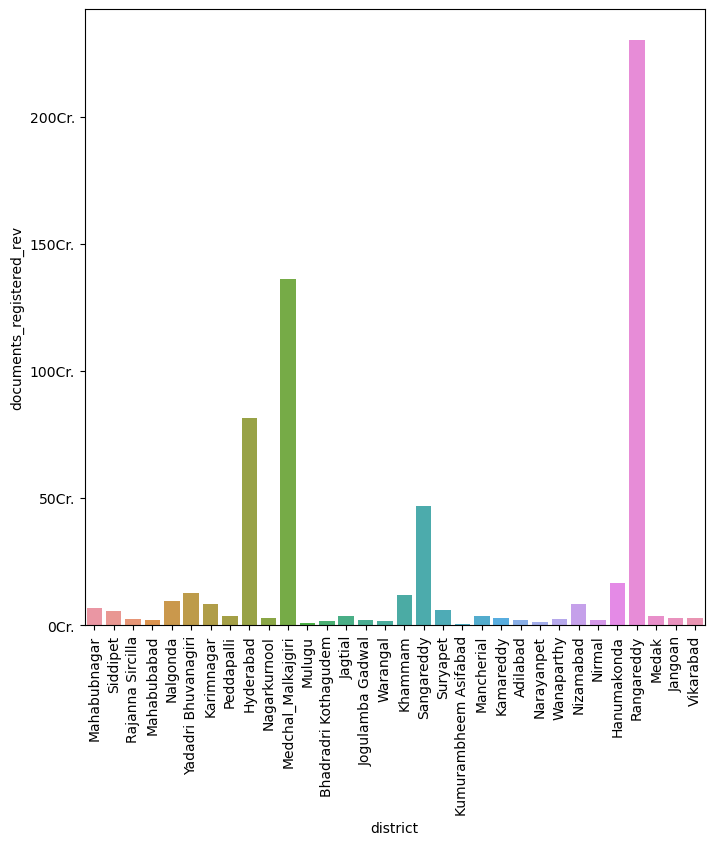

In [49]:
plt.figure(figsize=[8,8])
ax=sns.barplot(data=districtwise, x='district', y='documents_registered_rev',ci=False)
plt.ticklabel_format(style="plain", axis='y')
import matplotlib.ticker as ticker
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:.0f}Cr.'.format(x/10000000))
ax.yaxis.set_major_formatter(ticks_y)
plt.xticks(rotation=90)
plt.show()

### observation:
- In Rangareddy district Maximum revenue is generated by documents registered.
- In Kumurambherm Asifabad Minimum revenue is generated by documents registered.

#### Top 5 documnent registered revenue

In [50]:
districtwise.nlargest(5, 'documents_registered_rev', keep='all')

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,Mmm,quarter,fiscal_year,district
1348,15_1,2022-01-01,24420,4073496212,27045,4294273078,Jan,Q4,2021,Rangareddy
1351,15_1,2022-04-01,20482,3827108069,21615,3995805965,Apr,Q1,2022,Rangareddy
1343,15_1,2021-07-01,25965,3702422339,28135,3912082631,Jul,Q2,2021,Rangareddy
1349,15_1,2022-02-01,19924,3651414062,20412,3255572073,Feb,Q4,2021,Rangareddy
1347,15_1,2021-12-01,23804,3615678359,24783,3637276396,Dec,Q3,2021,Rangareddy


### Overservation:
- Top 5 documnent registered revenue is from Rangareddy district

#### Top 5 district where documnent registered revenue is highest.

In [51]:
districtwise[['documents_registered_cnt','documents_registered_rev', 'district','estamps_challans_rev']].groupby('district').sum('documents_registered_rev').nlargest(5, 'documents_registered_rev')

,documents_registered_cnt,documents_registered_rev,estamps_challans_rev
district,,,
Rangareddy,919064,108198682809,81336993463
Medchal_Malkajgiri,575722,64071382839,48819368222
Hyderabad,215770,38396743983,28652397786
Sangareddy,290694,22024502771,16708219605
Hanumakonda,189652,7927494100,5751116148


### Observation: Top 5 district where document registered revenue is highest--
- Rangareddy, Medchal_Malkajgiri, Hyderabad, Sangareddy and Hanumakonda

#### 5 district where documents registered revenue is lowest.

In [52]:
districtwise[['documents_registered_cnt','documents_registered_rev','district','estamps_challans_rev']].groupby('district').sum().nsmallest(5,'documents_registered_rev',keep='all')

,documents_registered_cnt,documents_registered_rev,estamps_challans_rev
district,,,
Kumurambheem Asifabad,12663,227462583,145692452
Mulugu,33725,515528121,408743315
Narayanpet,51242,722273314,517604092
Warangal,40471,738341643,484464966
Bhadradri Kothagudem,30356,824712666,616009645


### Observation: 5 district where documents registered revenue is lowest are----
- Kumurambheem Asifabad, Mulugu, Narayanpet, Warangal and Bhadradri Kothagudem

### Districtwise estamps challans revenue

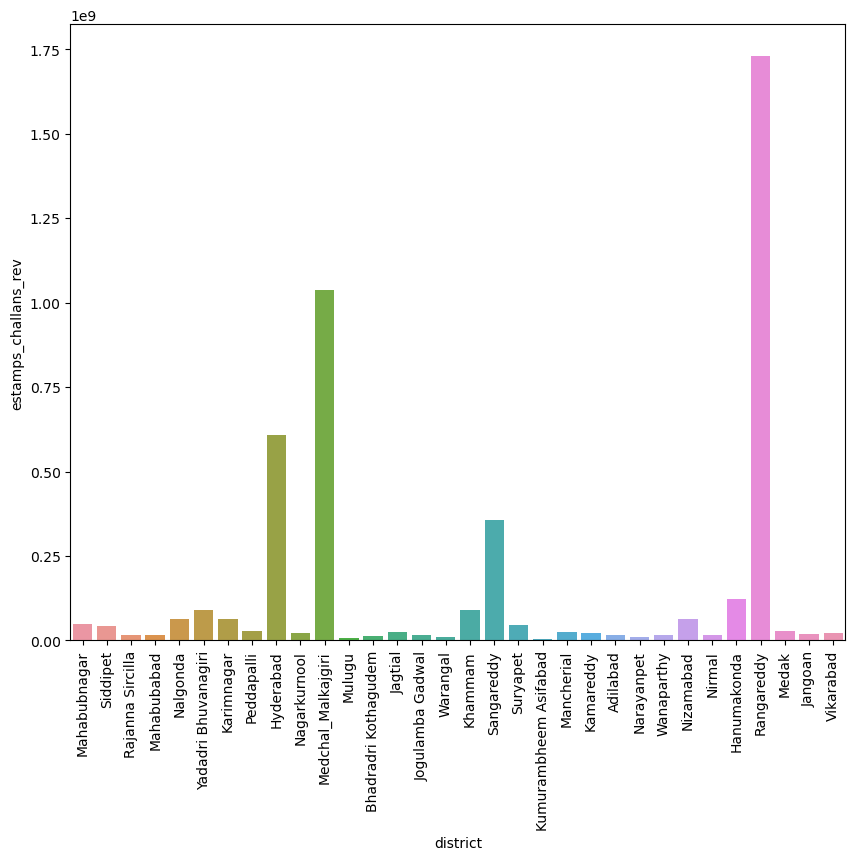

In [53]:
plt.figure(figsize=[10,8])
sns.barplot(data=districtwise, x='district', y='estamps_challans_rev',ci=False)
plt.xticks(rotation=90)
plt.show()

### observation:
- In Rangareddy district Maximum revenue is genarated by estamps_challans.
- In Kumurambherm Asifabad Minimum revenue is genarated by estamps_challans.

#### Top 5 district where 'estamps_challans revenue is highest.

In [54]:
districtwise[['documents_registered_cnt','documents_registered_rev','district','estamps_challans_rev']].groupby('district').sum('estamps_challans_rev').nlargest(5,'estamps_challans_rev',keep='all')

,documents_registered_cnt,documents_registered_rev,estamps_challans_rev
district,,,
Rangareddy,919064,108198682809,81336993463
Medchal_Malkajgiri,575722,64071382839,48819368222
Hyderabad,215770,38396743983,28652397786
Sangareddy,290694,22024502771,16708219605
Hanumakonda,189652,7927494100,5751116148


### Observation: Top 5 district where estamps_challans revenue is highest --
- Rangareddy, Medchal_Malkajgiri, Hyderabad, Sangareddy and Hanumakonda

In [55]:
districtwise[['district','estamps_challans_rev']].nlargest(5,'estamps_challans_rev',keep='all')

,district,estamps_challans_rev
1348,Rangareddy,4294273078
1351,Rangareddy,3995805965
1343,Rangareddy,3912082631
1362,Rangareddy,3716779175
1350,Rangareddy,3694327454


#### Top 5 highest estamps challan revenue is generated by Rangareddy district

#### 5 district where estamps_challans_rev revenue is lowest.

In [56]:
districtwise[['documents_registered_cnt','documents_registered_rev','district','estamps_challans_rev']].groupby('district').sum().nsmallest(5,'estamps_challans_rev',keep='all')

,documents_registered_cnt,documents_registered_rev,estamps_challans_rev
district,,,
Kumurambheem Asifabad,12663,227462583,145692452
Mulugu,33725,515528121,408743315
Warangal,40471,738341643,484464966
Narayanpet,51242,722273314,517604092
Bhadradri Kothagudem,30356,824712666,616009645


### Observation: 5 district where estamps_challans revenue is lowest----
- Kumurambheem Asifabad, Mulugu, Warangal, Narayanpet and Bhadradri Kothagudem

In [57]:
districtwise1= districtwise[districtwise['fiscal_year']==2022]
districtwise1.head()

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,Mmm,quarter,fiscal_year,district
35,14_1,2022-04-01,3253,105448377,3285,105928140,Apr,Q1,2022,Mahabubnagar
36,14_1,2022-05-01,2983,111506589,3112,116263639,May,Q1,2022,Mahabubnagar
37,14_1,2022-06-01,2552,90044509,2598,89618011,Jun,Q1,2022,Mahabubnagar
38,14_1,2022-07-01,2477,85214519,2563,84543841,Jul,Q2,2022,Mahabubnagar
39,14_1,2022-08-01,2619,92104718,2723,96154871,Aug,Q2,2022,Mahabubnagar


In [58]:
districtwise1.groupby('district').sum().nlargest(5,'estamps_challans_rev', keep='all')

,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,fiscal_year
district,,,,,
Rangareddy,232668,37697750946,245168,38349357618,24264
Medchal_Malkajgiri,162443,24043523530,170898,23596183308,24264
Hyderabad,63115,14266012441,68399,14374315032,24264
Sangareddy,71718,8273200321,74347,8259605302,24264
Hanumakonda,48326,2817238587,52167,2846856844,24264


### Merging ipass and districtwise dataframe

In [59]:
district_ipass= pd.merge(districtwise,ipass, how='inner', on= 'dist_code')
district_ipass.head()

,dist_code,month_x,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,Mmm,quarter,fiscal_year,district,month_y,sector,investment in cr,number_of_employees,Year
0,14_1,2019-04-01,4533,59236363,0,0,Apr,Q1,2019,Mahabubnagar,2019-01-04,Engineering,2.32,15,2019
1,14_1,2019-04-01,4533,59236363,0,0,Apr,Q1,2019,Mahabubnagar,2019-01-04,Paper and Printing,14.40,305,2019
2,14_1,2019-04-01,4533,59236363,0,0,Apr,Q1,2019,Mahabubnagar,2019-01-05,Pharmaceuticals and Chemicals,66.90,190,2019
3,14_1,2019-04-01,4533,59236363,0,0,Apr,Q1,2019,Mahabubnagar,2019-01-05,Granite and Stone Crushing,0.00,1000,2019
4,14_1,2019-04-01,4533,59236363,0,0,Apr,Q1,2019,Mahabubnagar,2019-01-05,Food Processing,3.78,90,2019


## Sectorwise document registered revenue generated 

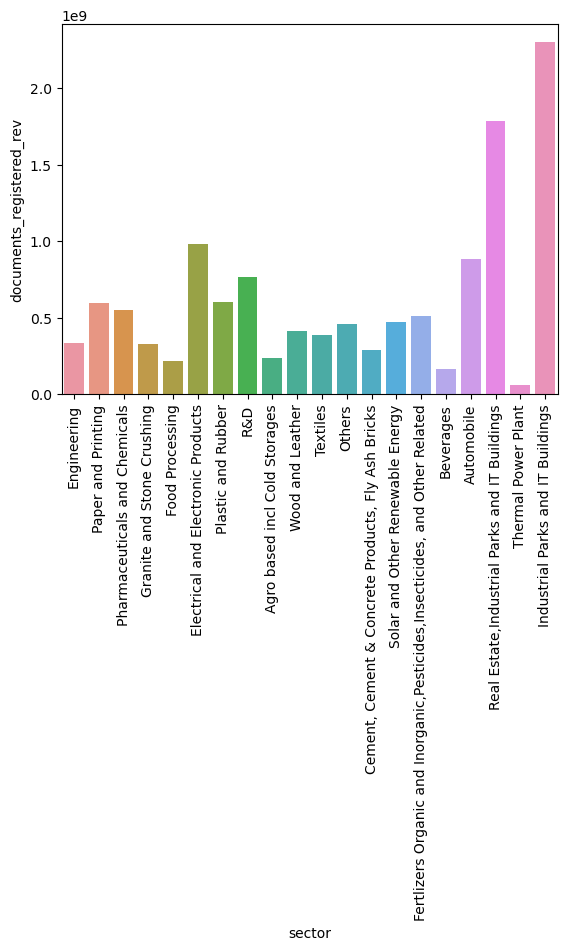

In [60]:
plt.figure()
sns.barplot(data=district_ipass, x='sector', y='documents_registered_rev',ci=False)
plt.xticks(rotation=90)
plt.show()

### observation:
- Maximum documents registered revenue is generated by industrial park and IT buildings sector.
- Mimimum documents registered revenue is generated by Thermal power plant sector.

### Sectorwise destamps challans revenue generated

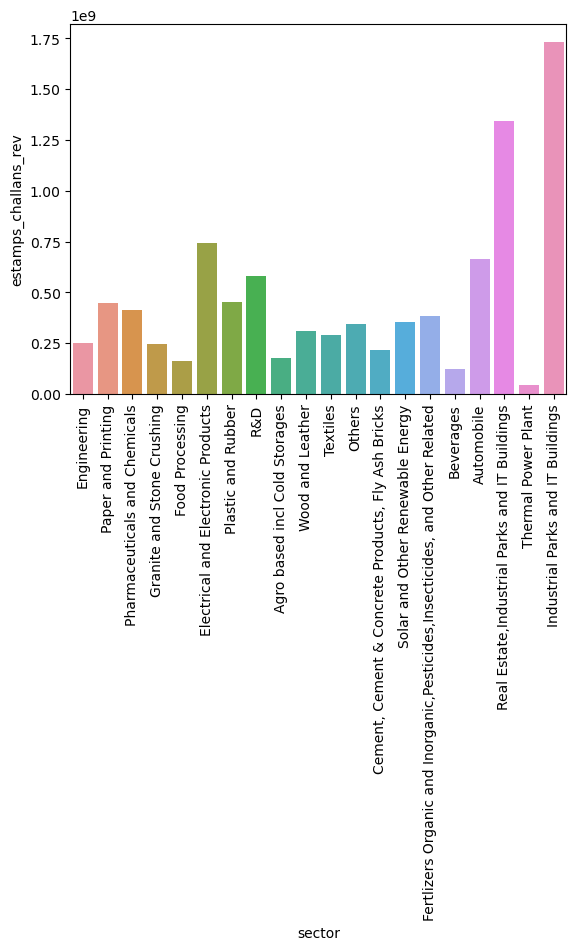

In [61]:
plt.figure()
sns.barplot(data=district_ipass, x='sector', y='estamps_challans_rev',ci=False)
plt.xticks(rotation=90)
plt.show()

### observation:
- Maximum estamps_challans revenue is generated by industrial park and IT buildings sector.
- Mimimum estamps_challans revenue is generated by Thermal power plant sector.

### Investment made in different sector

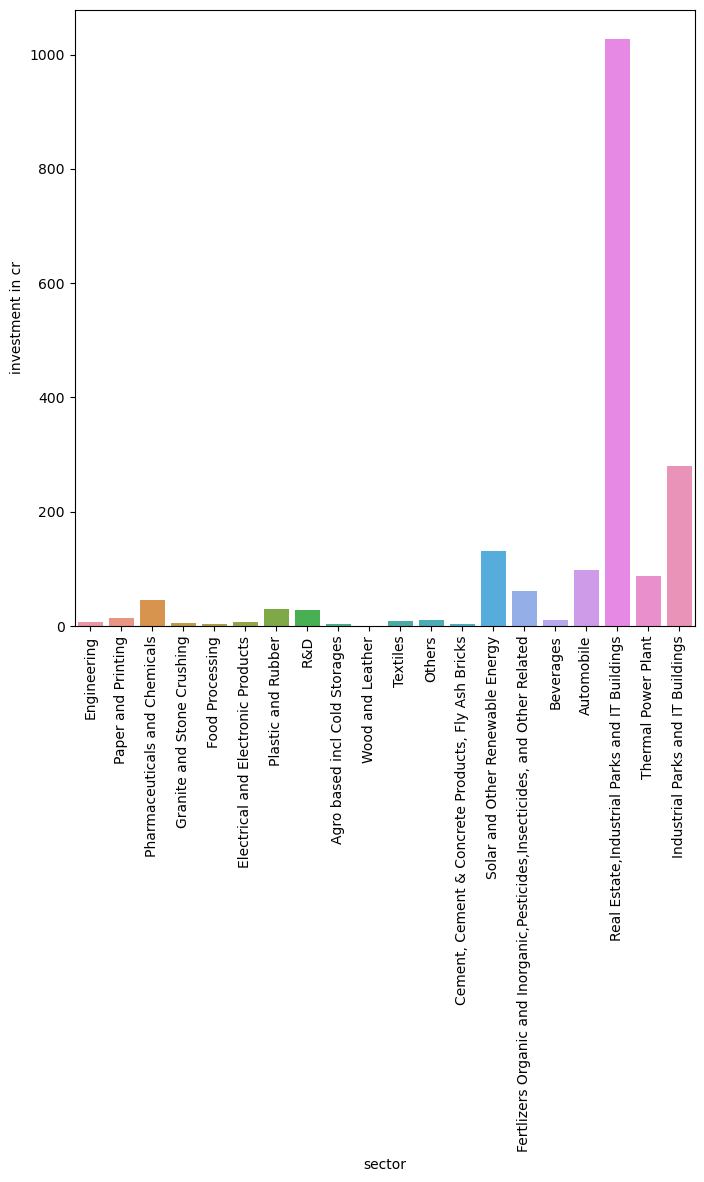

In [62]:
plt.figure(figsize=[8,8])
sns.barplot(data=district_ipass, x='sector', y='investment in cr',ci=False)
plt.xticks(rotation=90)
plt.show()

### observation:
- Maximum investment is made in Real Estate,industrial park and IT buildings sector.
- Mimimum investment is made in Wood and Leather sector.

#### Top 5 sectors witnessed most investment in 2022

In [63]:
top= district_ipass[district_ipass['fiscal_year']==2022].groupby('sector').sum().nlargest(5,'investment in cr')
top[['investment in cr','documents_registered_rev','estamps_challans_rev']]

,investment in cr,documents_registered_rev,estamps_challans_rev
sector,,,
"Real Estate,Industrial Parks and IT Buildings",357338.09,858289665191,868434300639
Pharmaceuticals and Chemicals,190296.67,3290134305944,3295747667832
Plastic and Rubber,115795.39,3310299466431,3317291801155
Solar and Other Renewable Energy,67676.44,339420967893,341405803382
"Fertlizers Organic and Inorganic,Pesticides,Insecticides, and Other Related",65020.77,771806041148,767362161648


### Investment made in different district

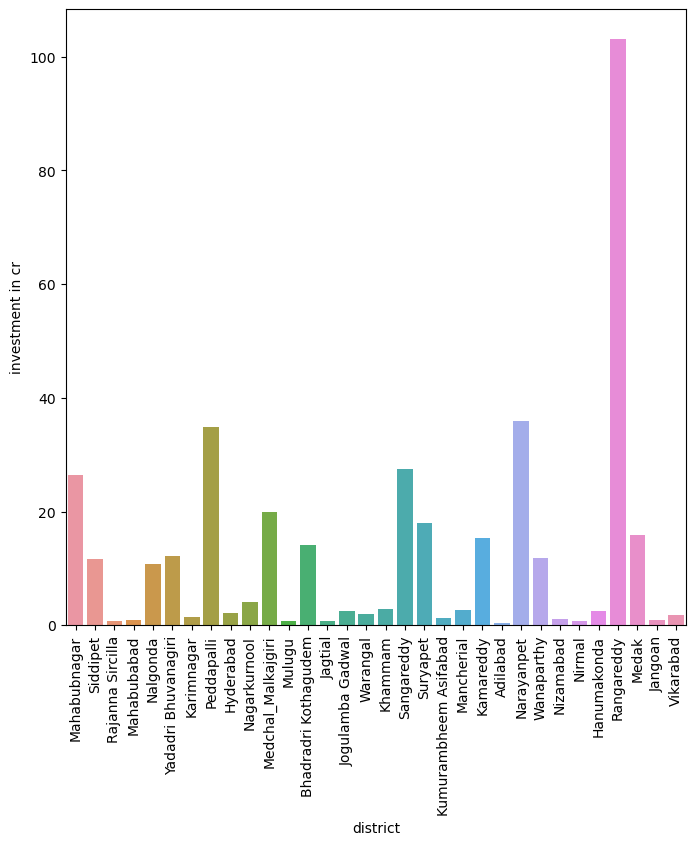

In [113]:
plt.figure(figsize=[8,8])
sns.barplot(data=district_ipass, x='district', y='investment in cr',ci=False)
plt.xticks(rotation=90)
plt.show()

### observation:
- Maximum investment is made in Rangareddy district.
- Mimimum investment is made in Adilabad district.

#### Top 5 district witnessed most investment

In [65]:
district_ipass[['district','investment in cr','documents_registered_rev','estamps_challans_rev']].groupby('district').sum().nlargest(3,'investment in cr')

,investment in cr,documents_registered_rev,estamps_challans_rev
district,,,
Rangareddy,2007197.60,44794254682926,33673515293682
Sangareddy,581237.51,9911026246950,7518698822250
Medchal_Malkajgiri,488544.37,33317119076280,25386071475440


### Investment made in different fiscal year

<AxesSubplot:xlabel='fiscal_year', ylabel='investment in cr'>

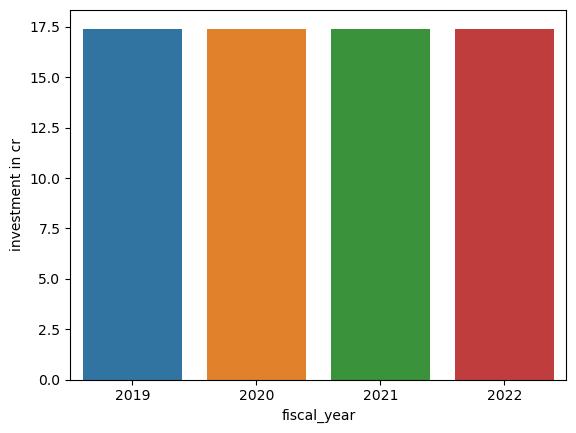

In [66]:
sns.barplot(data=district_ipass, x='fiscal_year', y='investment in cr',ci=False)

### Observation- Equal amount is invested every year.

### Investment made in different quarters

<AxesSubplot:xlabel='quarter', ylabel='investment in cr'>

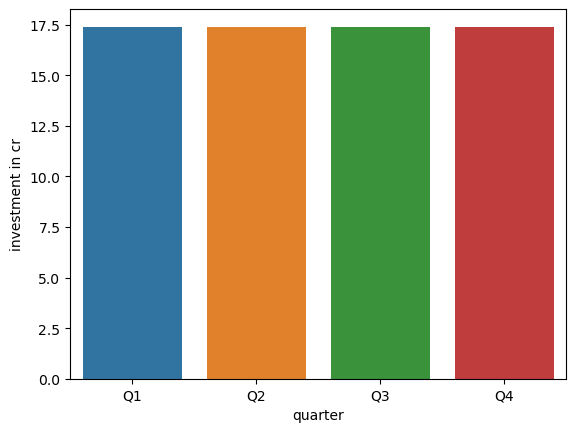

In [67]:
sns.barplot(data=district_ipass, x='quarter', y='investment in cr',ci=False)

### Observation- Equal amount is invested every quarter.

In [68]:
pd.set_option('display.max_columns', None)
district_ipass[['sector','district']].groupby('sector')['district'].nunique().sort_values(ascending=False).reset_index()

,sector,district
0,Agro based incl Cold Storages,32
1,Food Processing,32
2,Plastic and Rubber,31
3,Others,31
4,"Cement, Cement & Concrete Products, Fly Ash Br...",31
5,Engineering,30
6,Granite and Stone Crushing,30
7,Pharmaceuticals and Chemicals,30
8,Beverages,29
9,Textiles,29


### Analysis of transport dataframe

In [69]:
transport_sale= pd.merge(transport,district, how='inner', on= 'dist_code')
transport_sale.head()

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,district
0,15_1,2019-04-01,17910,3011,76,22,15308,4429,0,4,1278,16110,4182,717,19542,1477,19856,1163,Rangareddy
1,15_1,2019-05-01,17962,3280,76,27,15060,4667,0,13,1605,15958,4454,903,19894,1451,19888,1457,Rangareddy
2,15_1,2019-06-01,19367,3656,95,35,16711,4376,0,21,2045,17798,4327,984,21387,1766,21210,1943,Rangareddy
3,15_1,2019-07-01,18266,3038,72,39,15846,3762,0,10,1797,16907,3729,741,19700,1715,19726,1689,Rangareddy
4,15_1,2019-08-01,18269,3446,68,34,15533,4084,0,14,2186,16802,4216,781,20159,1658,19721,2096,Rangareddy


In [70]:
transport_date= pd.merge(districtwise,transport, how='inner', on= 'dist_code')

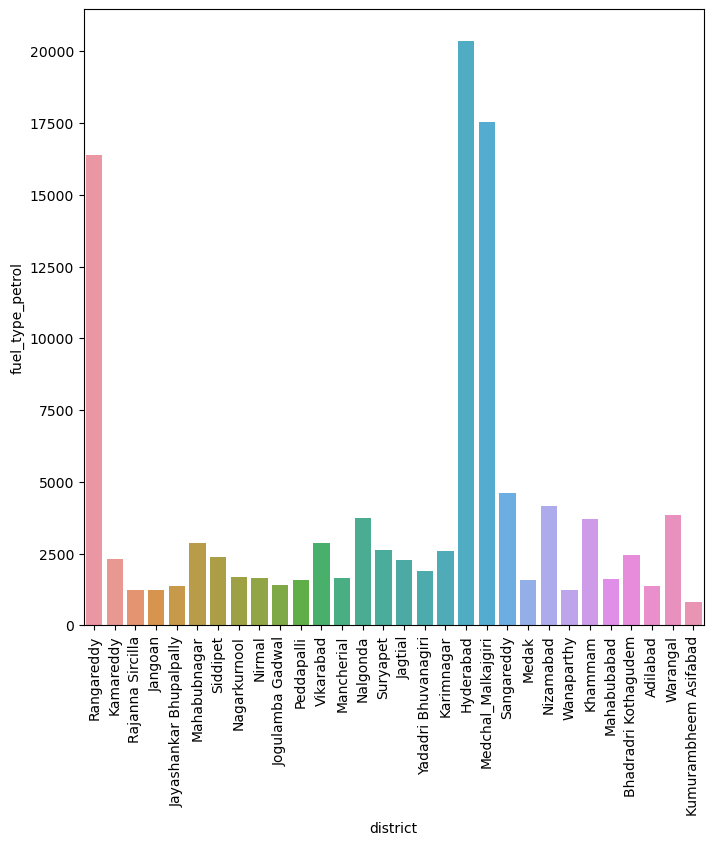

In [71]:
plt.figure(figsize=[8,8])
sns.barplot(data=transport_sale, x='district', y='fuel_type_petrol',ci=False)
plt.xticks(rotation=90)
plt.show()

### Observation:
- Maximum petrol vehicle is sold in Hyderabad district followed by Medchal Malkajgiri and Rangareddy.
- Minimum petrol vehicle is sold in Kumurambheem Asifabad district. 

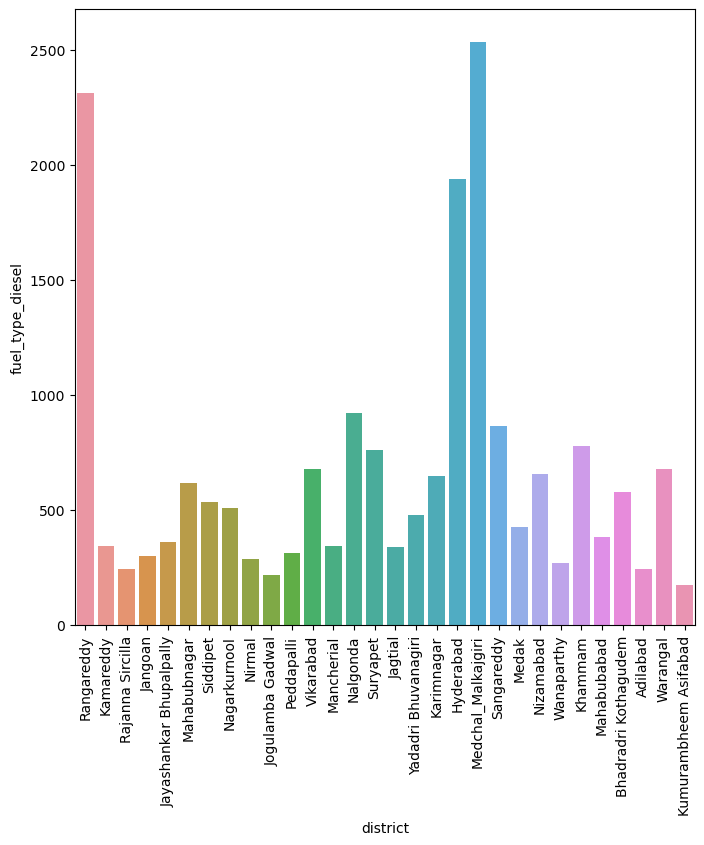

In [72]:
plt.figure(figsize=[8,8])
sns.barplot(data=transport_sale, x='district', y='fuel_type_diesel',ci=False)
plt.xticks(rotation=90)
plt.show()

### Observation:
- Maximum diesel is sold in Medchal Malkajgiri district followed by Rangareddy and Hyderabad.
- Minimum diesel is sold in Kumurambheem Asifabad district. 

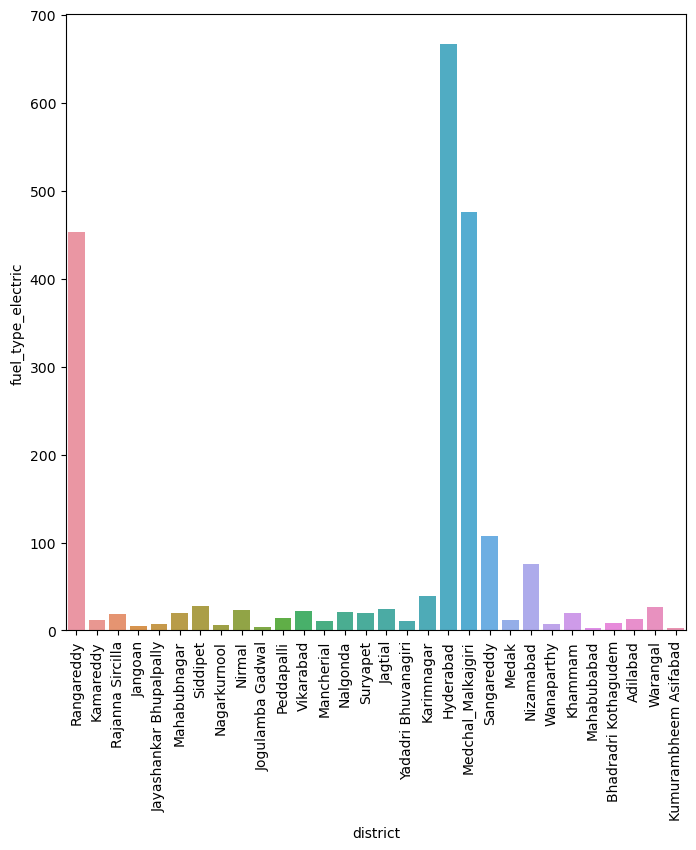

In [73]:
plt.figure(figsize=[8,8])
sns.barplot(data=transport_sale, x='district', y='fuel_type_electric',ci=False)
plt.xticks(rotation=90)
plt.show()

### Observation:
- Maximum electric is sold in Hyderabad district followed by Medchal Malkajgiri and Rangareddy.
- Minimum electric is sold in Kumurambheem Asifabad district. 

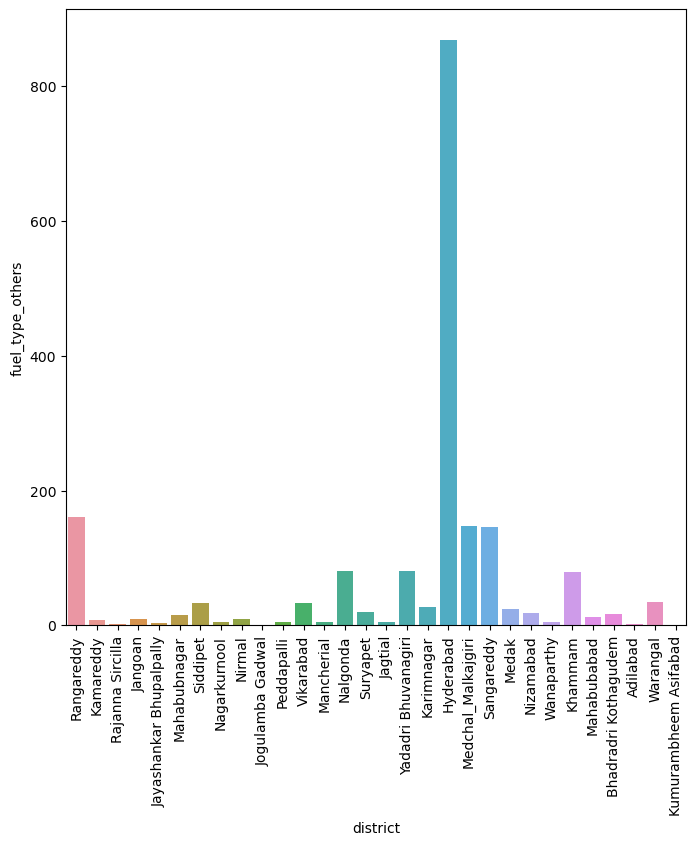

In [74]:
plt.figure(figsize=[8,8])
sns.barplot(data=transport_sale, x='district', y='fuel_type_others',ci=False)
plt.xticks(rotation=90)
plt.show()

### Observation:
- Maximum other type is sold in Hyderabad district.
- Minimum other type is sold in Kumurambheem Asifabad district. 

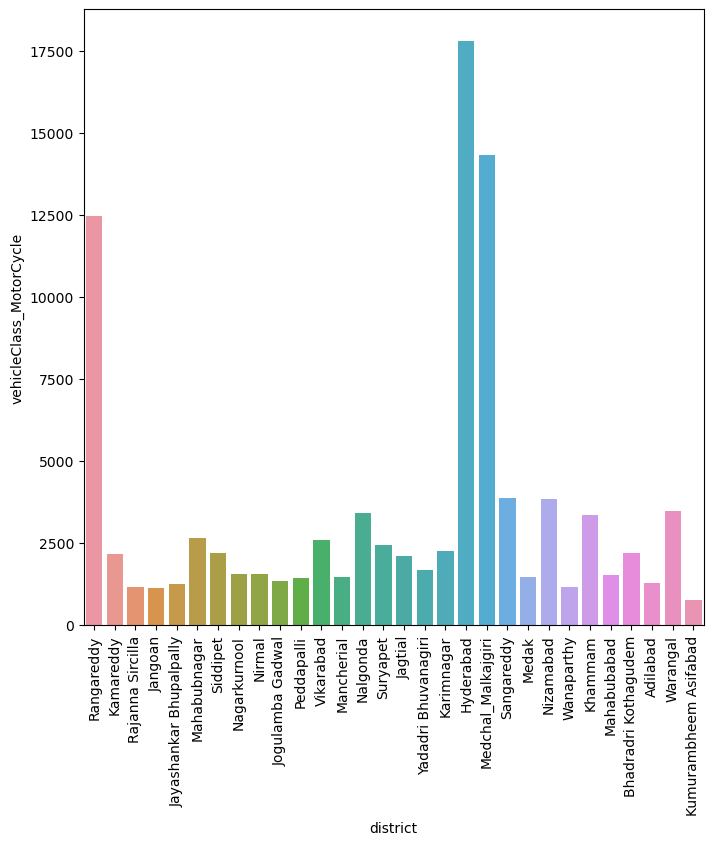

In [75]:
plt.figure(figsize=[8,8])
sns.barplot(data=transport_sale, x='district', y='vehicleClass_MotorCycle',ci=False)
plt.xticks(rotation=90)
plt.show()

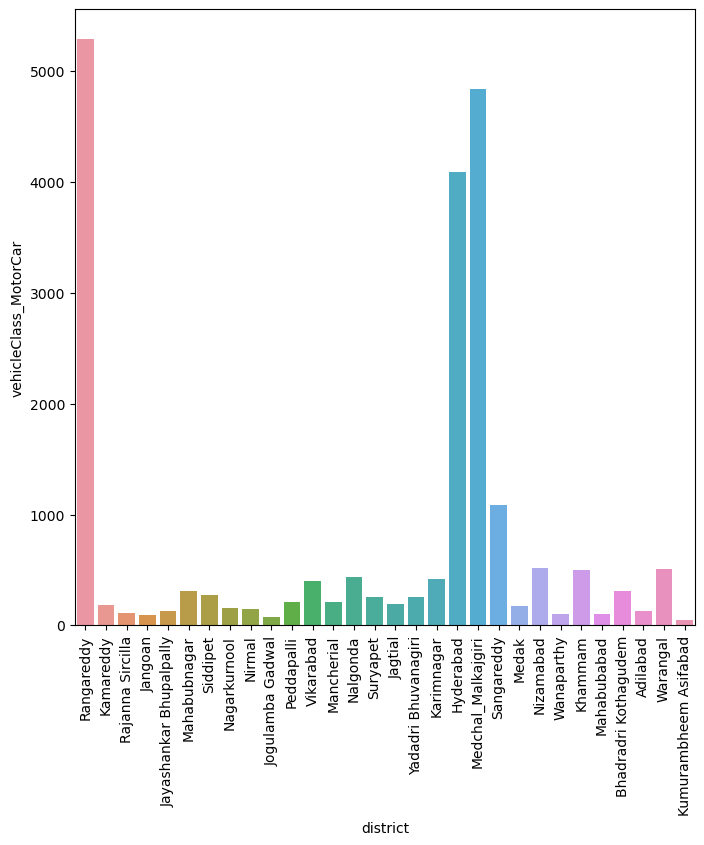

In [76]:
plt.figure(figsize=[8,8])
sns.barplot(data=transport_sale, x='district', y='vehicleClass_MotorCar',ci=False)
plt.xticks(rotation=90)
plt.show()

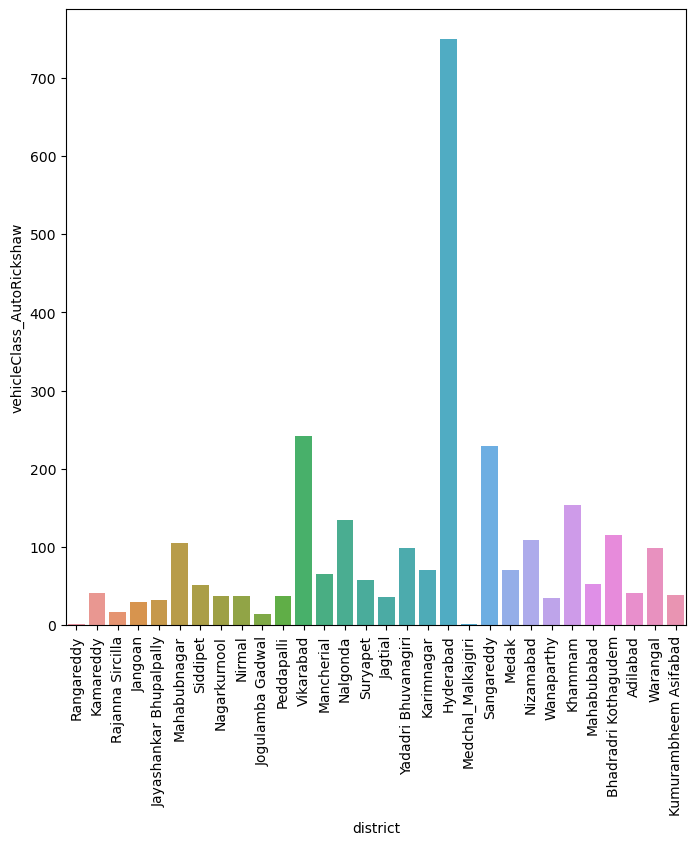

In [77]:
plt.figure(figsize=[8,8])
sns.barplot(data=transport_sale, x='district', y='vehicleClass_AutoRickshaw',ci=False)
plt.xticks(rotation=90)
plt.show()

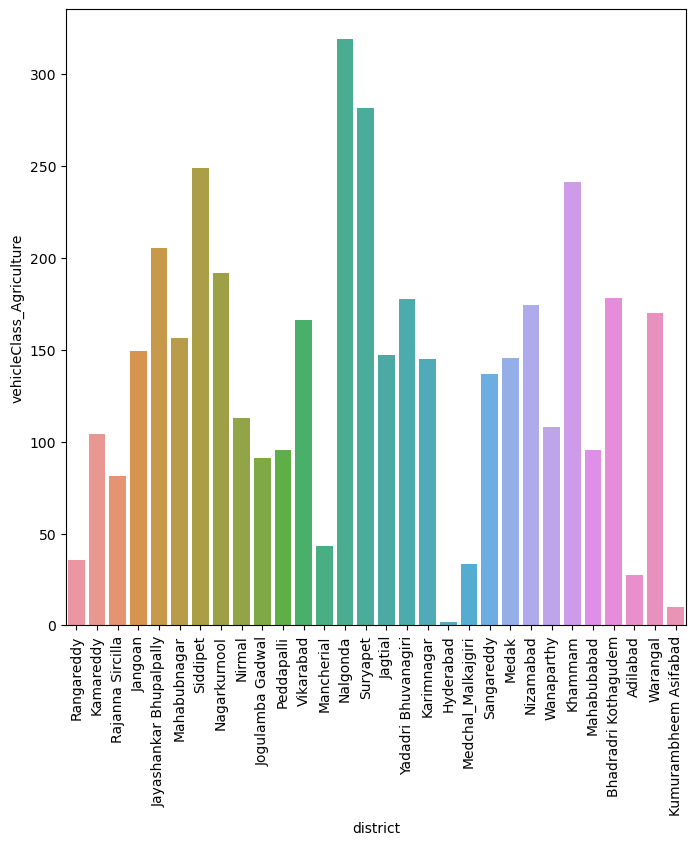

In [78]:
plt.figure(figsize=[8,8])
sns.barplot(data=transport_sale, x='district', y='vehicleClass_Agriculture',ci=False)
plt.xticks(rotation=90)
plt.show()

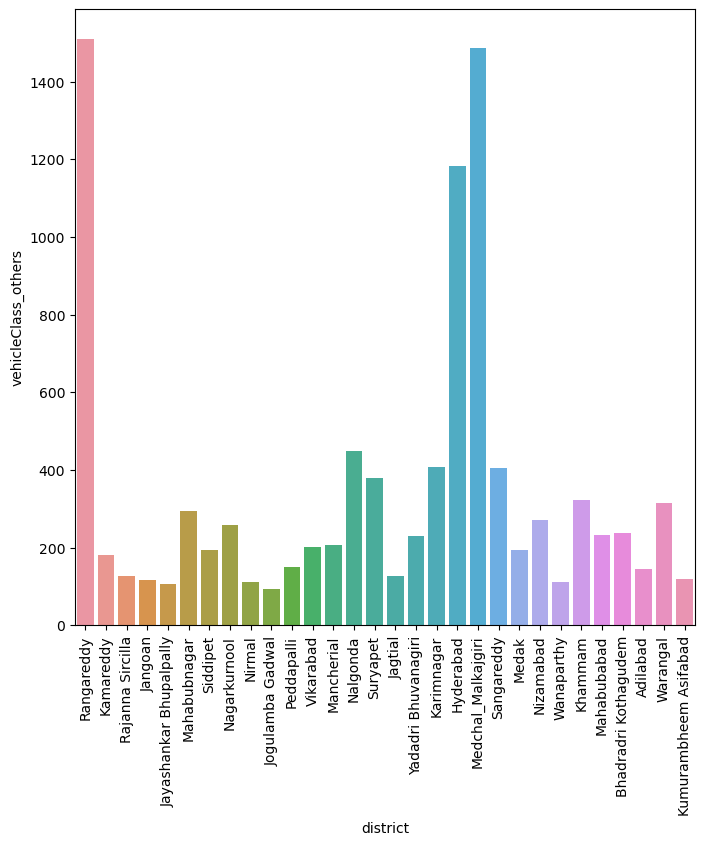

In [79]:
plt.figure(figsize=[8,8])
sns.barplot(data=transport_sale, x='district', y='vehicleClass_others',ci=False)
plt.xticks(rotation=90)
plt.show()

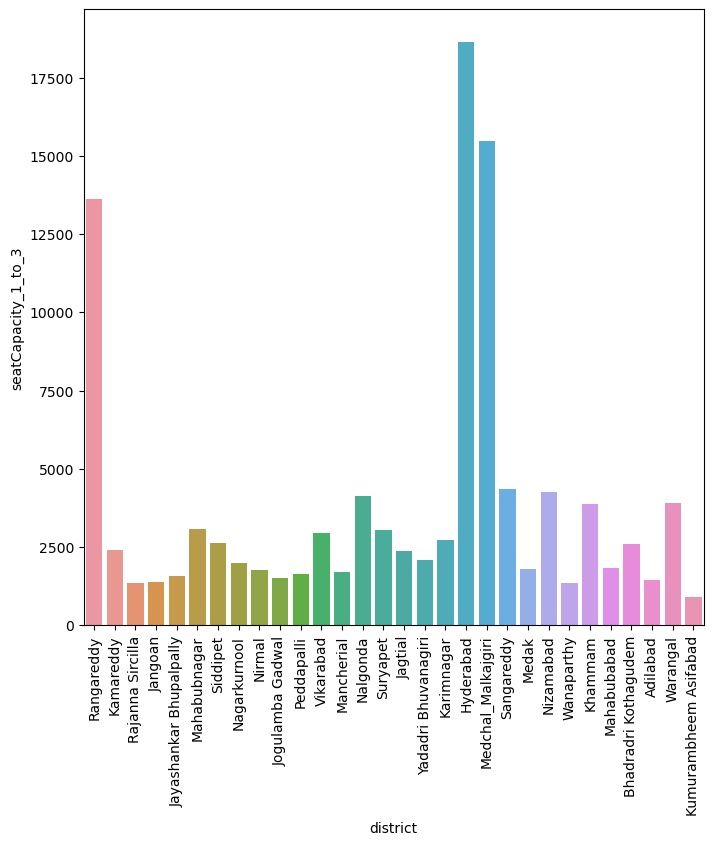

In [80]:
plt.figure(figsize=[8,8])
sns.barplot(data=transport_sale, x='district', y='seatCapacity_1_to_3',ci=False)
plt.xticks(rotation=90)
plt.show()

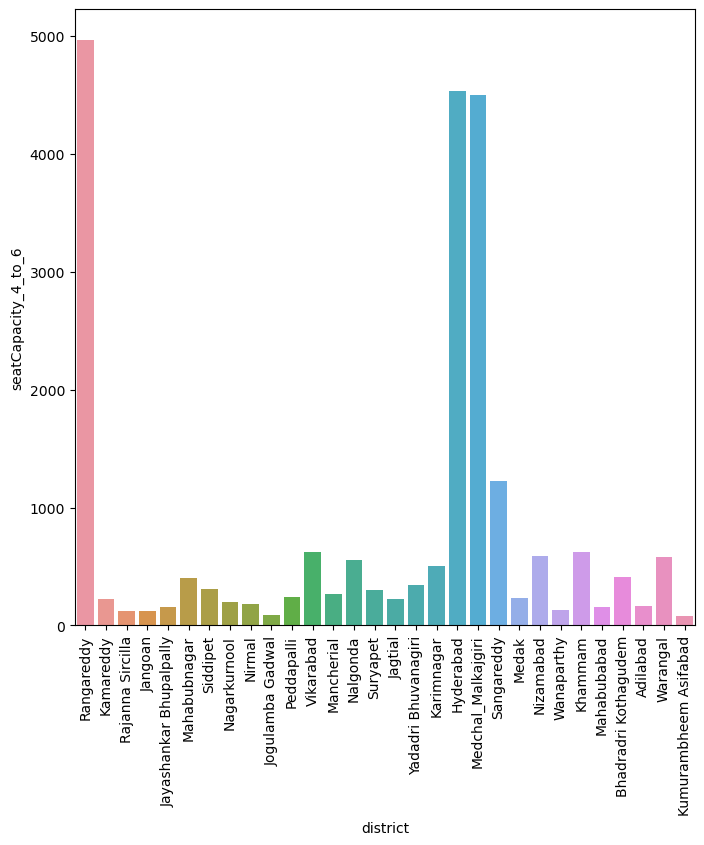

In [81]:
plt.figure(figsize=[8,8])
sns.barplot(data=transport_sale, x='district', y='seatCapacity_4_to_6',ci=False)
plt.xticks(rotation=90)
plt.show()

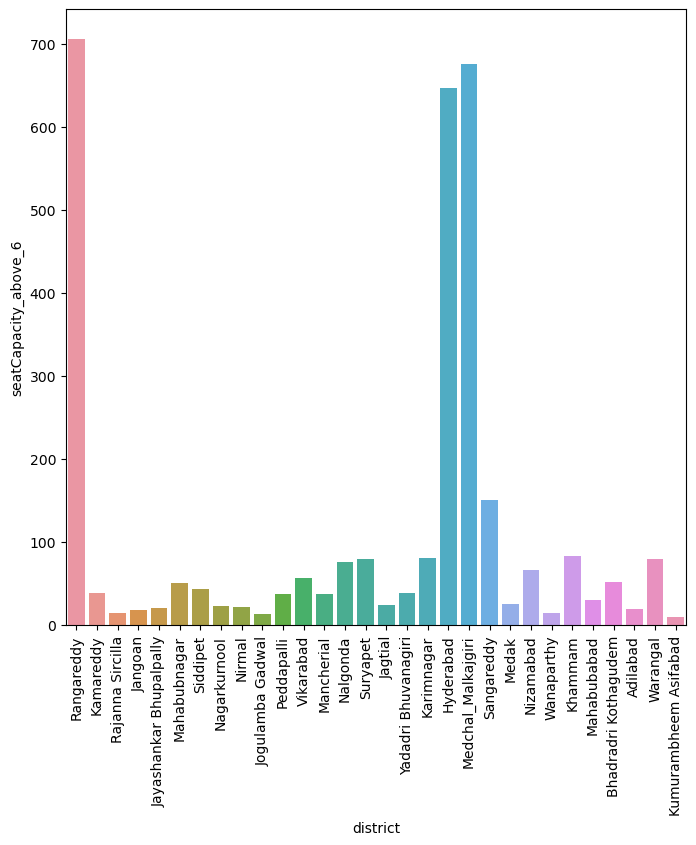

In [82]:
plt.figure(figsize=[8,8])
sns.barplot(data=transport_sale, x='district', y='seatCapacity_above_6',ci=False)
plt.xticks(rotation=90)
plt.show()

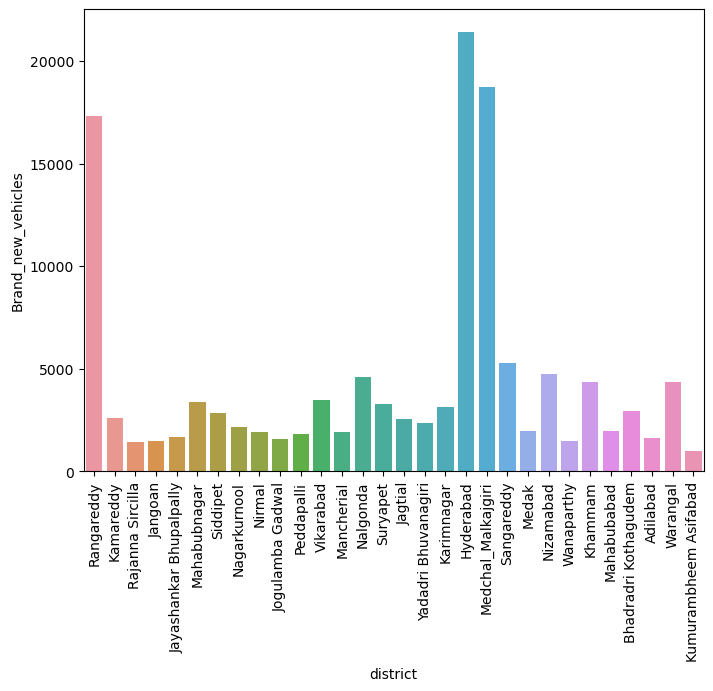

In [83]:
plt.figure(figsize=[8,6])
sns.barplot(data=transport_sale, x='district', y='Brand_new_vehicles',ci=False)
plt.xticks(rotation=90)
plt.show()

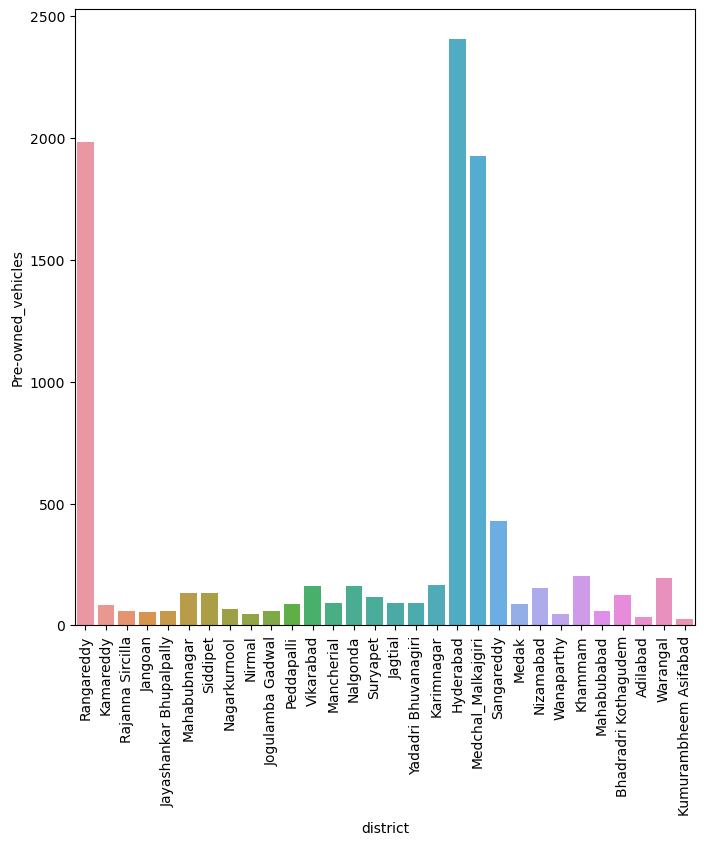

In [84]:
plt.figure(figsize=[8,8])
sns.barplot(data=transport_sale, x='district', y='Pre-owned_vehicles',ci=False)
plt.xticks(rotation=90)
plt.show()

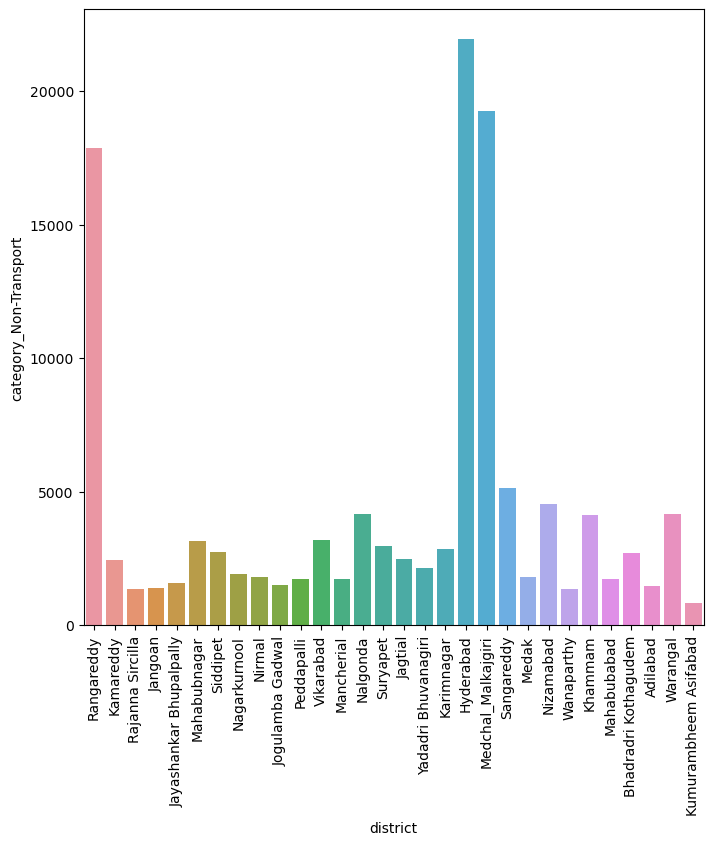

In [85]:
plt.figure(figsize=[8,8])
sns.barplot(data=transport_sale, x='district', y='category_Non-Transport',ci=False)
plt.xticks(rotation=90)
plt.show()

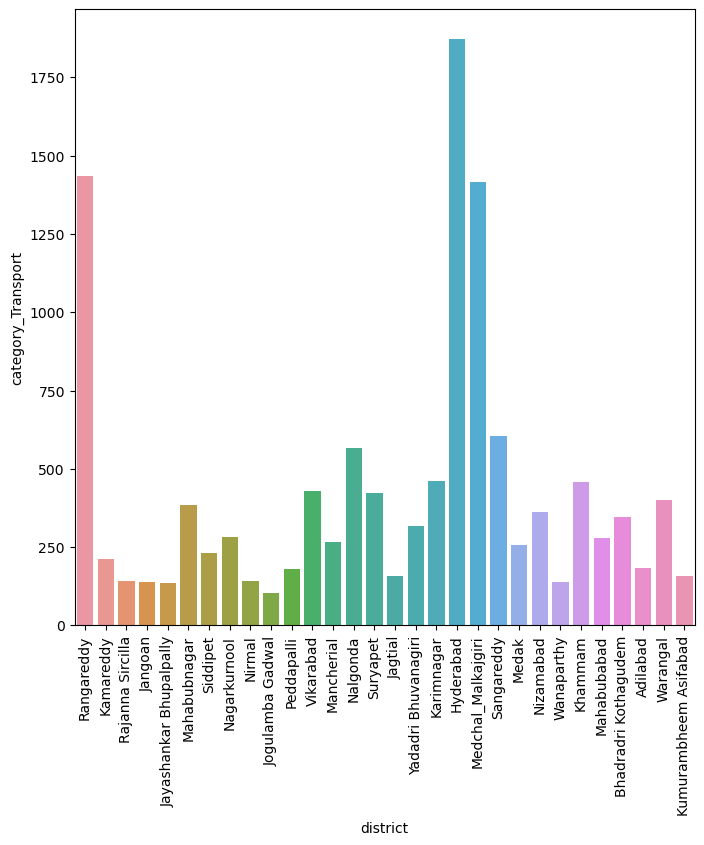

In [86]:
plt.figure(figsize=[8,8])
sns.barplot(data=transport_sale, x='district', y='category_Transport',ci=False)
plt.xticks(rotation=90)
plt.show()

In [87]:
districtwise.groupby('district').mean()

,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,fiscal_year
district,,,,,
Adilabad,962.23,22701521.09,644.40,17681665.02,2020.49
Bhadradri Kothagudem,645.87,17547078.00,442.77,13106588.19,2020.49
Hanumakonda,4035.15,168670087.23,2549.40,122364173.36,2020.49
Hyderabad,4590.85,816951999.64,3221.28,609625484.81,2020.49
Jagtial,1704.83,35448538.45,918.47,25587616.13,2020.49
Jangoan,1620.38,28295720.38,796.23,17933742.34,2020.49
Jogulamba Gadwal,1623.32,20825099.62,922.81,15092433.04,2020.49
Kamareddy,2088.04,29706303.55,1025.94,20904690.28,2020.49
Karimnagar,2833.19,85627128.81,1699.57,63597156.49,2020.49


In [88]:
transport_sale['month_number']= transport_sale['month'].dt.month

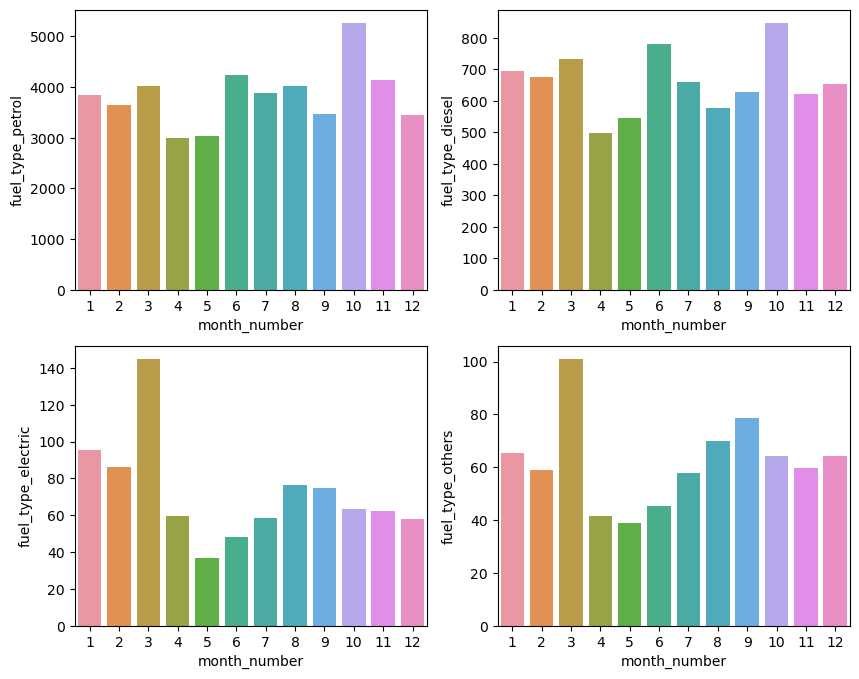

In [89]:
plt.figure(figsize=[10,8])
plt.subplot(2,2,1)
sns.barplot(data=transport_sale, x='month_number', y='fuel_type_petrol', ci= False)
plt.subplot(2,2,2)
sns.barplot(data=transport_sale, x='month_number', y='fuel_type_diesel', ci= False)
plt.subplot(2,2,3)
sns.barplot(data=transport_sale, x='month_number', y='fuel_type_electric', ci= False)
plt.subplot(2,2,4)
sns.barplot(data=transport_sale, x='month_number', y='fuel_type_others', ci= False)
plt.show()

## Observation:
- Transport which runs on petrol or diesel have highest sales in october.
- Transport which runs on petrol or diesel have lowest sales in April.
- Transport which has fuel type electric or other have highest sales in March.
- Transport which has fuel type electric or other have lowest sales in May.

In [90]:
transport_sale_2022 = transport_sale[transport_sale['month'].dt.year==2022]
transport_sale_2022

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,district,month_number
33,15_1,2022-01-01,13649,2114,649,199,10565,4698,2,34,1312,11716,4404,485,14815,1796,15348,1263,Rangareddy,1
34,15_1,2022-02-01,16066,2461,1078,214,12467,6115,4,35,1198,13514,5513,779,17540,2279,18715,1104,Rangareddy,2
35,15_1,2022-03-01,17657,2930,1142,268,13100,7383,2,25,1487,14382,6504,1111,19417,2580,20636,1361,Rangareddy,3
36,15_1,2022-04-01,17522,2203,1250,276,13642,6463,8,13,1125,14508,5802,933,18663,2588,20197,1054,Rangareddy,4
37,15_1,2022-05-01,17691,2267,872,208,13286,6347,2,29,1374,14296,5722,972,18577,2461,19735,1303,Rangareddy,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,19_4,2022-08-01,452,101,14,0,424,52,22,7,62,483,68,14,539,28,483,84,Kumurambheem Asifabad,8
1433,19_4,2022-09-01,442,131,6,2,429,27,23,16,86,528,44,9,558,23,472,109,Kumurambheem Asifabad,9
1434,19_4,2022-10-01,480,128,8,2,463,27,25,7,96,559,52,7,590,28,497,121,Kumurambheem Asifabad,10
1435,19_4,2022-11-01,241,85,7,1,228,21,12,6,67,298,33,3,316,18,255,79,Kumurambheem Asifabad,11


In [91]:
transport_sale_2022[['vehicleClass_MotorCycle','vehicleClass_MotorCar','vehicleClass_AutoRickshaw','vehicleClass_Agriculture','vehicleClass_others']].groupby(transport_sale_2022['district']).sum()

,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others
district,,,,,
Adilabad,11691,1560,314,409,1536
Bhadradri Kothagudem,18645,3346,928,1910,2414
Hyderabad,208465,52898,8618,32,15687
Jagtial,14978,2197,239,820,1122
Jangoan,9494,1209,273,1238,1083
Jayashankar Bhupalpally,9633,1352,166,1796,1147
Jogulamba Gadwal,11110,937,103,874,1189
Kamareddy,16581,2230,261,725,2174
Karimnagar,20947,5153,801,1244,10930


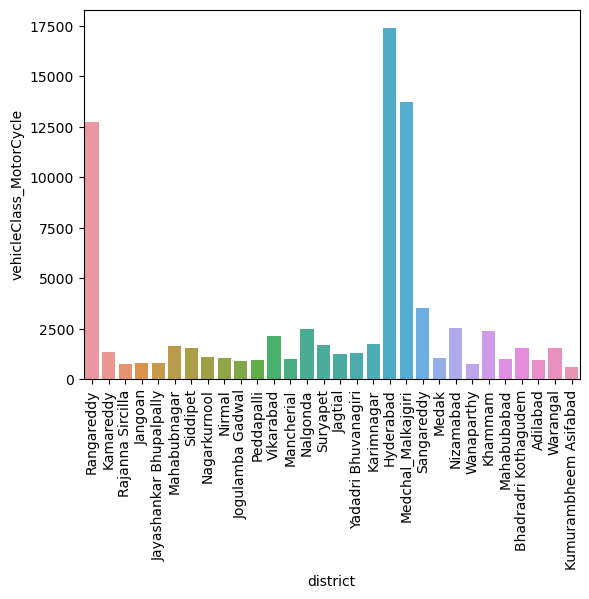

In [92]:
sns.barplot(data=transport_sale_2022, x='district', y='vehicleClass_MotorCycle',ci= False)
plt.xticks(rotation=90)
plt.show()

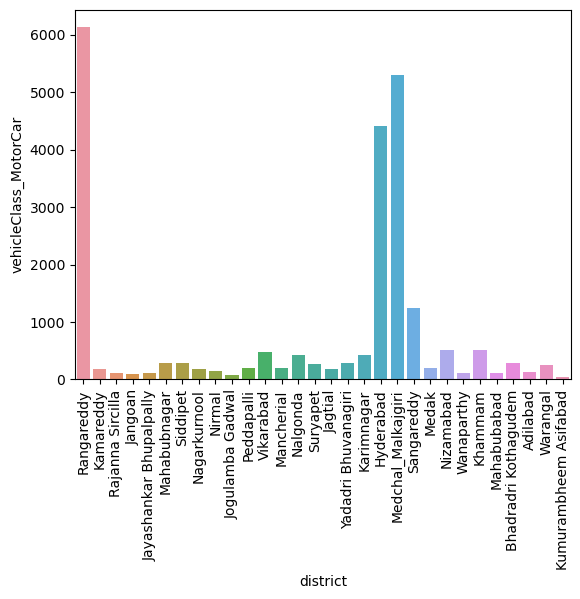

In [93]:
sns.barplot(data=transport_sale_2022, x='district', y='vehicleClass_MotorCar',ci= False)
plt.xticks(rotation=90)
plt.show()

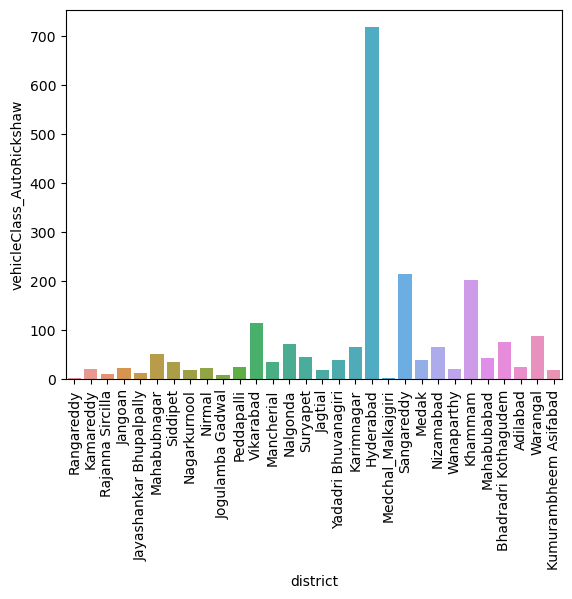

In [94]:
sns.barplot(data=transport_sale_2022, x='district', y='vehicleClass_AutoRickshaw',ci= False)
plt.xticks(rotation=90)
plt.show()

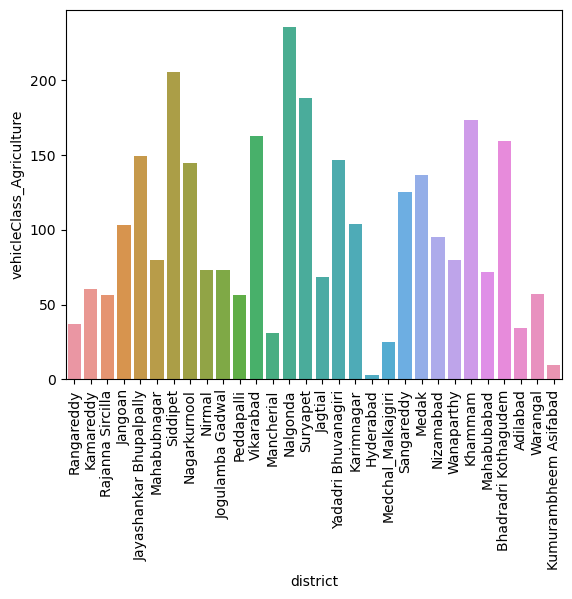

In [95]:
sns.barplot(data=transport_sale_2022, x='district', y='vehicleClass_Agriculture',ci= False)
plt.xticks(rotation=90)
plt.show()

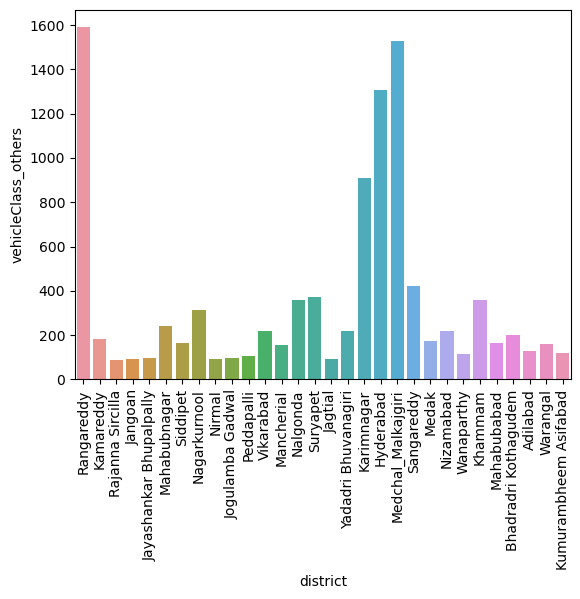

In [96]:
sns.barplot(data=transport_sale_2022, x='district', y='vehicleClass_others',ci= False)
plt.xticks(rotation=90)
plt.show()

In [97]:
transport_2021= transport_date[transport_date['fiscal_year']==2021]
transport_2022= transport_date[transport_date['fiscal_year']==2022]

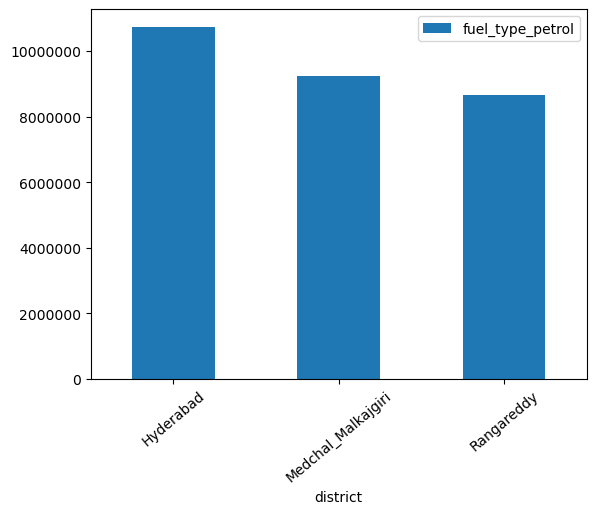

In [98]:
transport_2021[['district','fuel_type_petrol']].groupby(transport_2021['district']).sum().nlargest(3,'fuel_type_petrol',keep='all').plot(kind='bar')
plt.ticklabel_format(style="plain", axis='y')
plt.xticks(rotation=40)
plt.show()

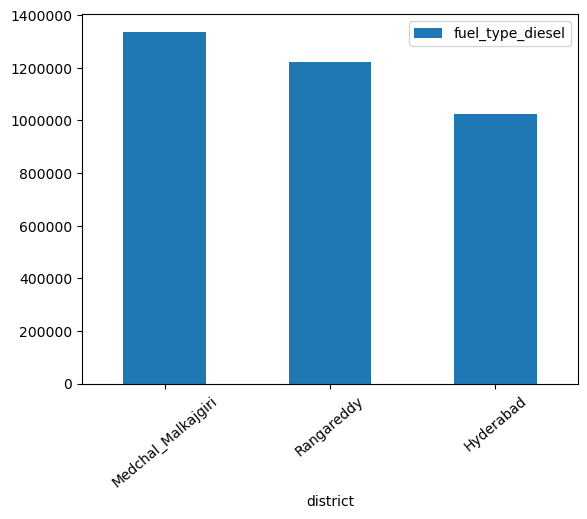

In [99]:
transport_2021[['district','fuel_type_diesel']].groupby(transport_2021['district']).sum().nlargest(3,'fuel_type_diesel',keep='all').plot(kind='bar')
plt.ticklabel_format(style="plain", axis='y')
plt.xticks(rotation=40)
plt.show()

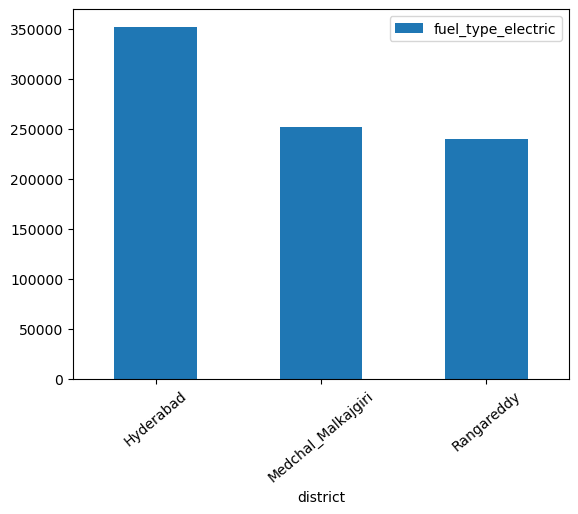

In [100]:
transport_2021[['district','fuel_type_electric']].groupby(transport_2021['district']).sum().nlargest(3,'fuel_type_electric',keep='all').plot(kind='bar')
plt.ticklabel_format(style="plain", axis='y')
plt.xticks(rotation=40)
plt.show()

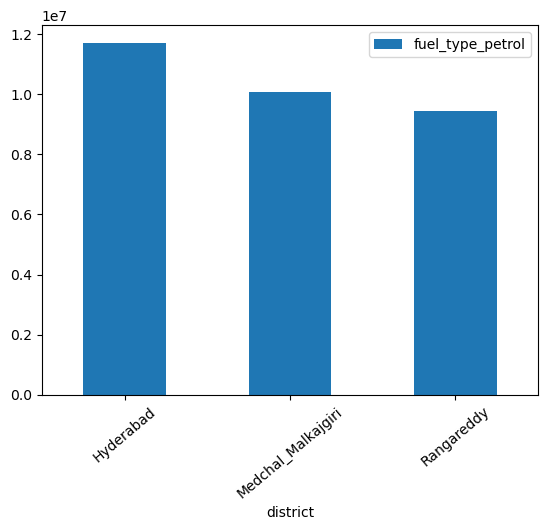

In [101]:
transport_2022[['district','fuel_type_petrol']].groupby(transport_2022['district']).sum().nlargest(3,'fuel_type_petrol',keep='all').plot(kind='bar')
plt.xticks(rotation=40)
plt.show()

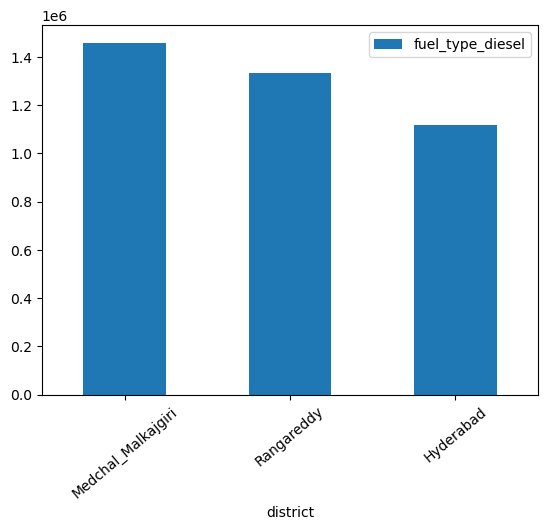

In [102]:
transport_2022[['district','fuel_type_diesel']].groupby(transport_2022['district']).sum().nlargest(3,'fuel_type_diesel',keep='all').plot(kind='bar')
plt.xticks(rotation=40)
plt.show()

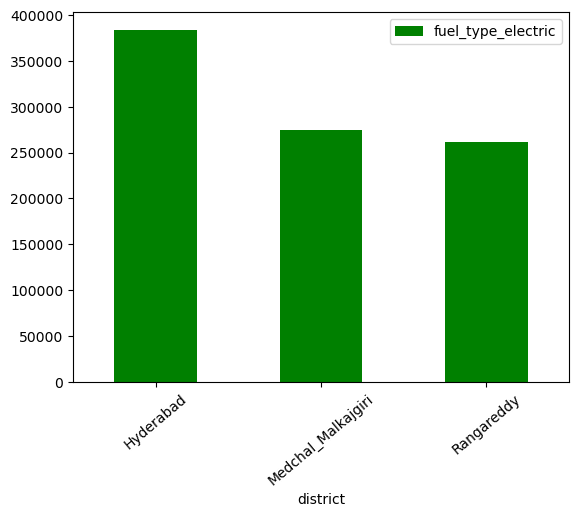

In [103]:
transport_2022[['district','fuel_type_electric']].groupby(transport_2022['district']).sum().nlargest(3,'fuel_type_electric',keep='all').plot(kind='bar', color='green')
plt.xticks(rotation=40)
plt.show()

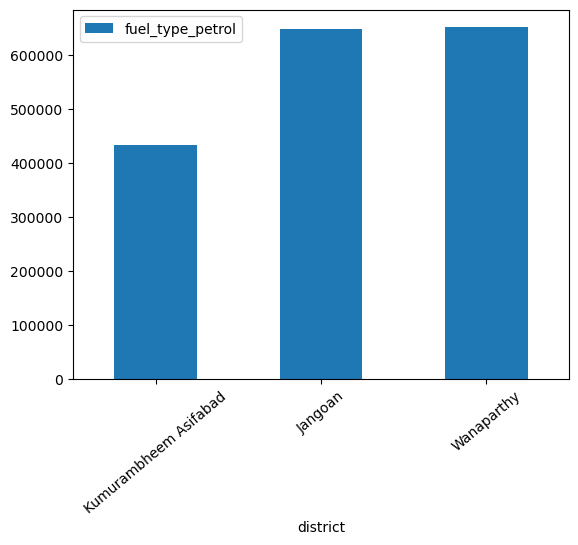

In [104]:
transport_2021[['district','fuel_type_petrol']].groupby(transport_2021['district']).sum().nsmallest(3,'fuel_type_petrol',keep='all').plot(kind='bar')
plt.ticklabel_format(style="plain", axis='y')
plt.xticks(rotation=40)
plt.show()

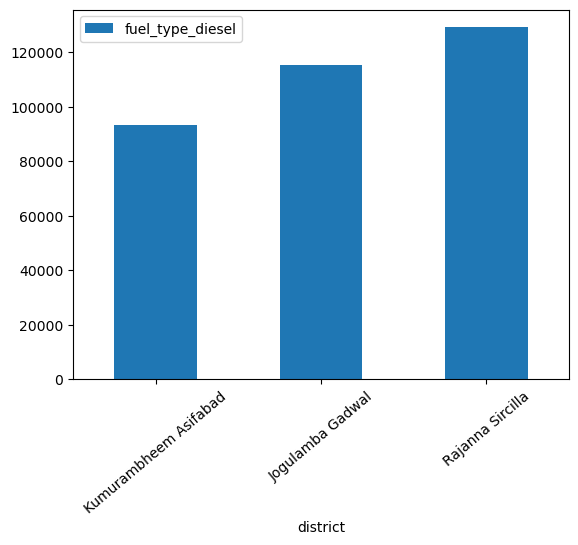

In [105]:
transport_2021[['district','fuel_type_diesel']].groupby(transport_2021['district']).sum().nsmallest(3,'fuel_type_diesel',keep='all').plot(kind='bar')
plt.ticklabel_format(style="plain", axis='y')
plt.xticks(rotation=40)
plt.show()


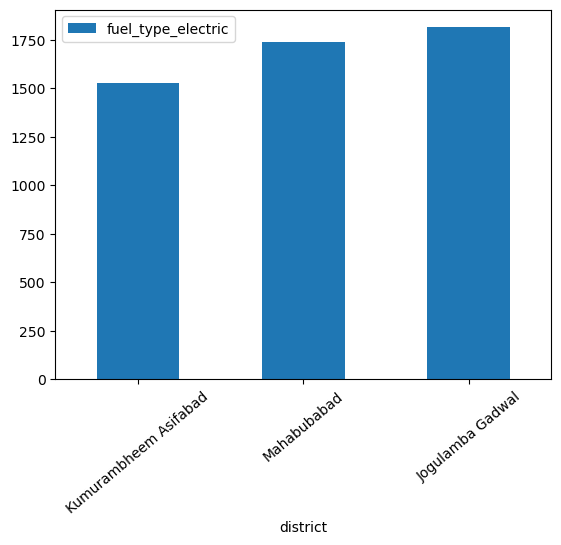

In [106]:
transport_2021[['district','fuel_type_electric']].groupby(transport_2021['district']).sum().nsmallest(3,'fuel_type_electric',keep='all').plot(kind='bar')
plt.ticklabel_format(style="plain", axis='y')
plt.xticks(rotation=40)
plt.show()

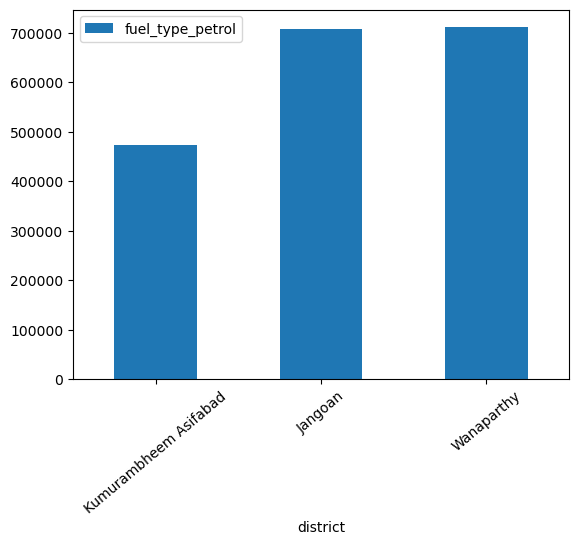

In [107]:
transport_2022[['district','fuel_type_petrol']].groupby(transport_2022['district']).sum().nsmallest(3,'fuel_type_petrol',keep='all').plot(kind='bar')
plt.ticklabel_format(style="plain", axis='y')
plt.xticks(rotation=40)
plt.show()

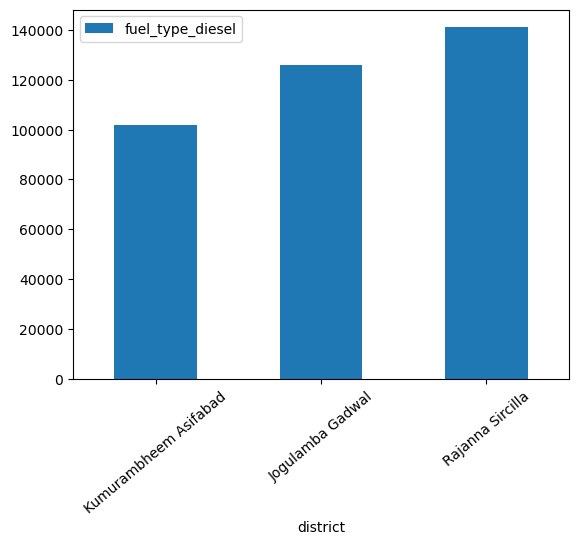

In [108]:
transport_2022[['district','fuel_type_diesel']].groupby(transport_2022['district']).sum().nsmallest(3,'fuel_type_diesel',keep='all').plot(kind='bar')
plt.ticklabel_format(style="plain", axis='y')
plt.xticks(rotation=40)
plt.show()

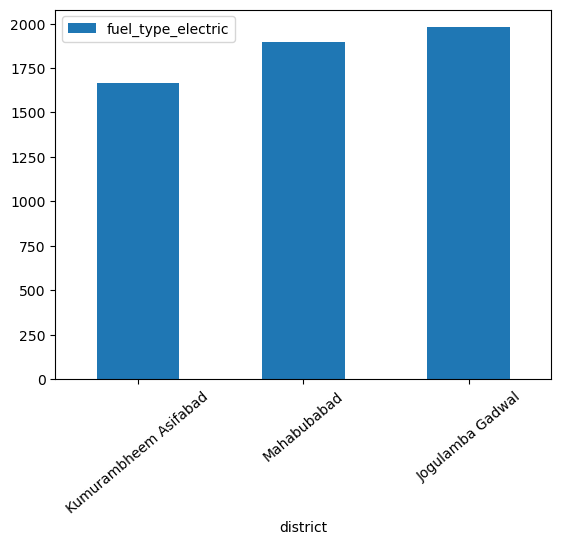

In [109]:
transport_2022[['district','fuel_type_electric']].groupby(transport_2022['district']).sum().nsmallest(3,'fuel_type_electric',keep='all').plot(kind='bar')
plt.ticklabel_format(style="plain", axis='y')
plt.xticks(rotation=40)
plt.show()

In [110]:
transport_sale['year_number']= transport_sale['month'].dt.year
t2022 = transport_sale[transport_sale['year_number']==2022]
t2022.head()

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,district,month_number,year_number
33,15_1,2022-01-01,13649,2114,649,199,10565,4698,2,34,1312,11716,4404,485,14815,1796,15348,1263,Rangareddy,1,2022
34,15_1,2022-02-01,16066,2461,1078,214,12467,6115,4,35,1198,13514,5513,779,17540,2279,18715,1104,Rangareddy,2,2022
35,15_1,2022-03-01,17657,2930,1142,268,13100,7383,2,25,1487,14382,6504,1111,19417,2580,20636,1361,Rangareddy,3,2022
36,15_1,2022-04-01,17522,2203,1250,276,13642,6463,8,13,1125,14508,5802,933,18663,2588,20197,1054,Rangareddy,4,2022
37,15_1,2022-05-01,17691,2267,872,208,13286,6347,2,29,1374,14296,5722,972,18577,2461,19735,1303,Rangareddy,5,2022


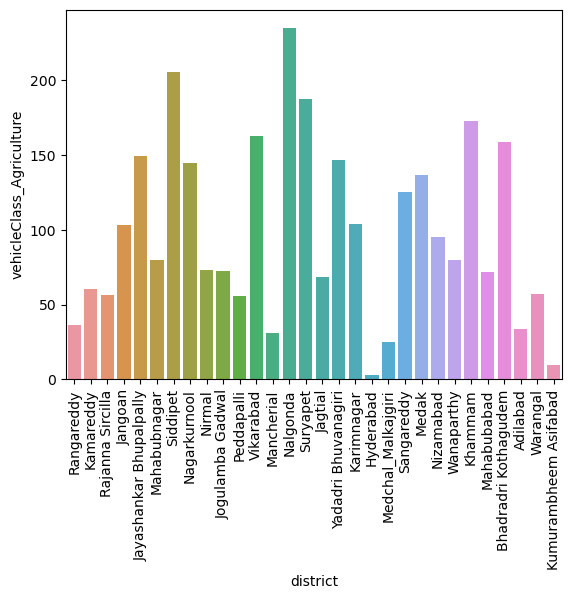

In [111]:

sns.barplot(data=t2022, x='district', y='vehicleClass_Agriculture',ci=False)
plt.xticks(rotation=90)
plt.show()

### Insights 

- Kumuram bheem asifabad district has low revenue generation through stamps whereas Jayashankar Bhupalpally district has no information about revenue generation through stamps.

- Investment in 2019 was the highest(approx. 41k cr.), in 2020 it decreased but after 2020 the investment increased rapidly.

- Sales of the vehicle is decreased in 2022 for petrol and diesel vehicles which will decrease the carbon footprint of the state, whereas sales of electric vehicles is increasing. 

- Maximum investment is done in Rangareddy district, the investment in Peddapalli district decreased drastically(2019- 6000Cr. 2022-26Cr.)  

- Investment in the Automobile sector and solar and other renewable energy sector has increased rapidly. 


## Recommendations 

- Promote e-stamp challan and registration of the document.

- Promote electric vehicles and encourage people to use public transport to decrease carbon footprints.

- Invest more in the R&D sector and agriculture sector. 

- Generate more employment in the R&D sector and solar and other renewable energy sectors. 

- Promote scheme and skill development in villages and areas where knowledge of these information is not reached